# Introduction

This project is based on `House Prices - Advanced Regression Techniques` kaggle competiton. We will only be using the train data from that competition. We will analyse 79 different features that describe every aspect of the residential homes in Ames, Iowa and subsequently make predictions on the final sale price of each home. This is an example of a regression problem in machine learning as sale price, which is our target variable, has a continuous distribution. Information regarding the columns in the dataset can be found in the data description file.

This project is going to be divided into phases and will be written in seperate Notebooks. The 3 phases of the project are as follows:
>1. EDA
>2. Preprocessing
>3. Model Building and Evaluation

So without any futher delay Let us begin..

# EDA for House Price Prediction

In [1]:
# import required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns
pd.set_option('display.max_columns',None) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
df=pd.read_csv('Data.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

# Basic Checks 

In [5]:
print('-'*100)
print('Shape of the DataFrame:',df.shape)
print('-'*100)

----------------------------------------------------------------------------------------------------
Shape of the DataFrame: (1460, 81)
----------------------------------------------------------------------------------------------------


In [6]:
print('-'*100)
df.info()
print('-'*100)

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 


In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
df.describe(include='O')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [9]:
print('-'*100)
print('Datatype of Each Column:')
print('-'*100)
df.dtypes

----------------------------------------------------------------------------------------------------
Datatype of Each Column:
----------------------------------------------------------------------------------------------------


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [10]:
print('-'*100)
print('Duplicated Values:',df.duplicated().sum())
print('-'*100)

----------------------------------------------------------------------------------------------------
Duplicated Values: 0
----------------------------------------------------------------------------------------------------


# Missing Values

In [11]:
print('-'*100)
print('Null Values:')
print('-'*100)
pd.set_option('display.max_rows',None)
df.isnull().sum()

----------------------------------------------------------------------------------------------------
Null Values:
----------------------------------------------------------------------------------------------------


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
pd.reset_option('display.max_rows')

In [13]:
# Pecentage of Missing Values for Each Column : 
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0] # list having columns with missing value
print('The Features that have missing values are as follows: \n',features_with_na)
print('The number of Features with missing values are:',len(features_with_na))
print('-'*125)
for feature in features_with_na:
    print('Percentage of missing values in {} Feature is {} %'.format(feature, np.round(df[feature].isnull().mean()*100, 2)))

The Features that have missing values are as follows: 
 ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
The number of Features with missing values are: 19
-----------------------------------------------------------------------------------------------------------------------------
Percentage of missing values in LotFrontage Feature is 17.74 %
Percentage of missing values in Alley Feature is 93.77 %
Percentage of missing values in MasVnrType Feature is 0.55 %
Percentage of missing values in MasVnrArea Feature is 0.55 %
Percentage of missing values in BsmtQual Feature is 2.53 %
Percentage of missing values in BsmtCond Feature is 2.53 %
Percentage of missing values in BsmtExposure Feature is 2.6 %
Percentage of missing values in BsmtFinType1 Feature is 2.53 %
Percentage of missing

# Finding Relationship between Missing Values and Target Variable

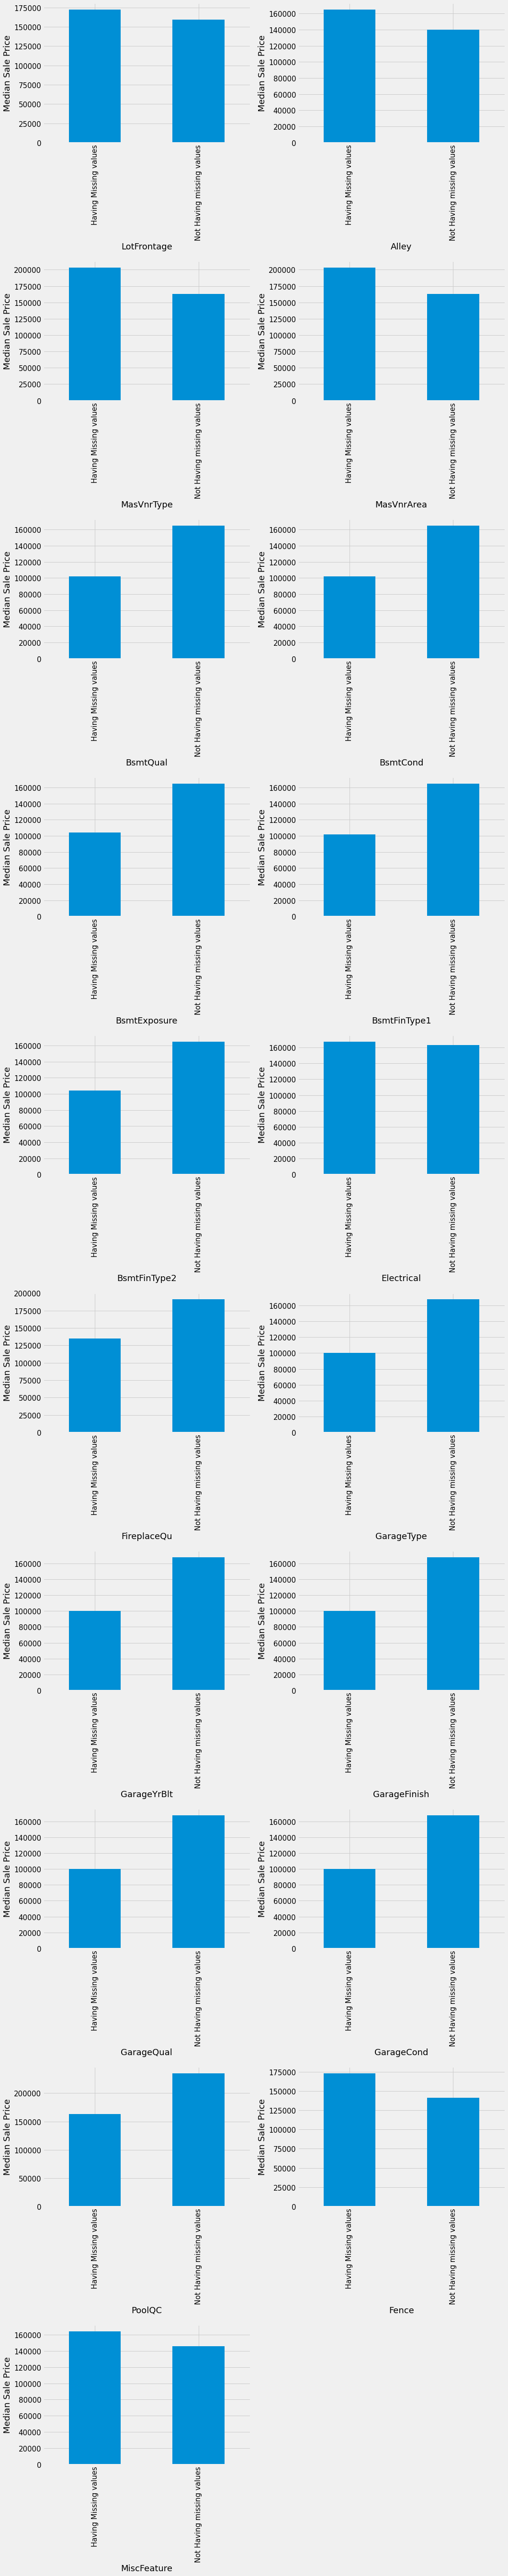

In [14]:
plt.figure(figsize=(15,75))
plotnum=1
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 'Missing values' if the observation was missing or 'Not Having missing values' otherwise
    data[feature] = np.where(data[feature].isnull(), 'Having Missing values', 'Not Having missing values')
    
    if(plotnum<=19): 
        ax=plt.subplot(10,2,plotnum) 
        data.groupby(feature)['SalePrice'].median().plot.bar()
        plt.ylabel('Median Sale Price')
    plotnum+=1
plt.tight_layout() 

>- Here we can see that in some cases when missing values are high, so is the sales price and in other cases they are inversely proportional. So we can clearly see there is a relationship between missing values and target variable.
>- We need to replace these missing values with something meaningful which we will do in the Feature Engineering section.
>- We also get to know from description file that some missing  values are not actually Nan values. For Eg: garage columns have nan means they no garage. So will have to impute the accordingly. Same applies for other features also

# Year Features

In [15]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

>From the dataset we can observe that there are 4 features related to year. We are going to analysis them.

In [16]:
# list containing year variable information
year_feature = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature] 
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [17]:
for feature in year_feature:
    print(feature,':\n', df[feature].unique())
    print('The number of unique features in {} is : {}'.format(feature,df[feature].nunique())) 
    print('-'*125)

YearBuilt :
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
The number of unique features in YearBuilt is : 112
-----------------------------------------------------------------------------------------------------------------------------
YearRemodAdd :
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 

<AxesSubplot:xlabel='YrSold', ylabel='count'>

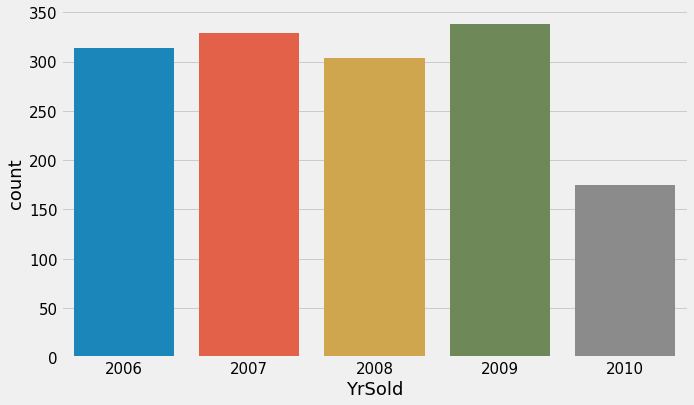

In [18]:
# Number of houses sold per year:
sns.countplot(df['YrSold'])

>The number of houses sold in the year 2006-2009 fairly remains consistent in the range 300-350.
There is a sharp decrease in houses sold in 2010.

# Finding relation between year the house is sold and the Sales Price

Text(0.5, 1.0, 'House Price vs YearSold')

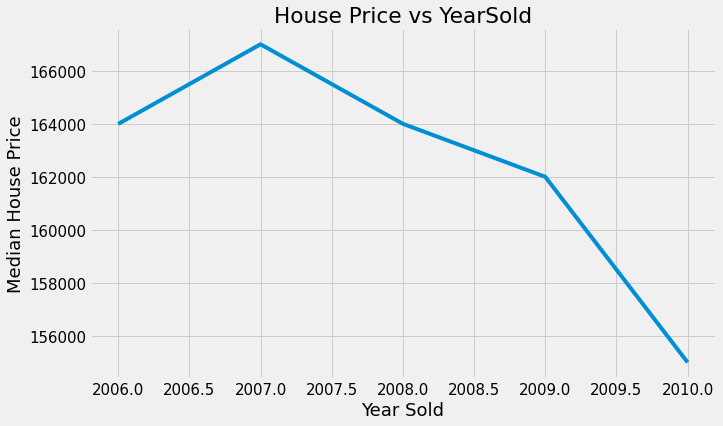

In [19]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

>- As year increases sale price decreases, which is actually opposite of real world trends, so we need to find more info.
>- This can also be partially due to the Financial crisis that happened in 2007-2008 and after affects of that leading to a decline in houses sold.

# Analysis of few year features

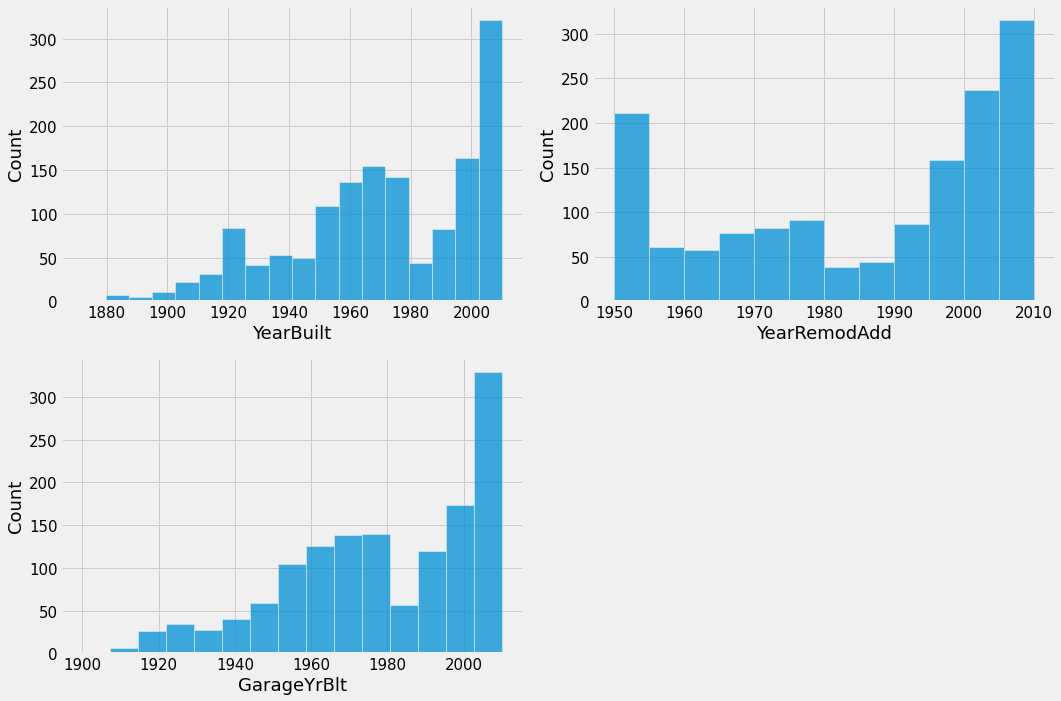

In [20]:
# Univariate Analysis :

plt.figure(figsize=(15,10))
plotnum=1
for feature in year_feature:
    if(plotnum<=3): # ignoring year sold feature
        ax=plt.subplot(2,2,plotnum) 
        sns.histplot(df[feature])
    plotnum+=1
plt.tight_layout()  

>- The number of houses(New and Remodelled),garages built after the year 2000 is fairly high.
>- Around 1960's As houses were built, garages were also constructed

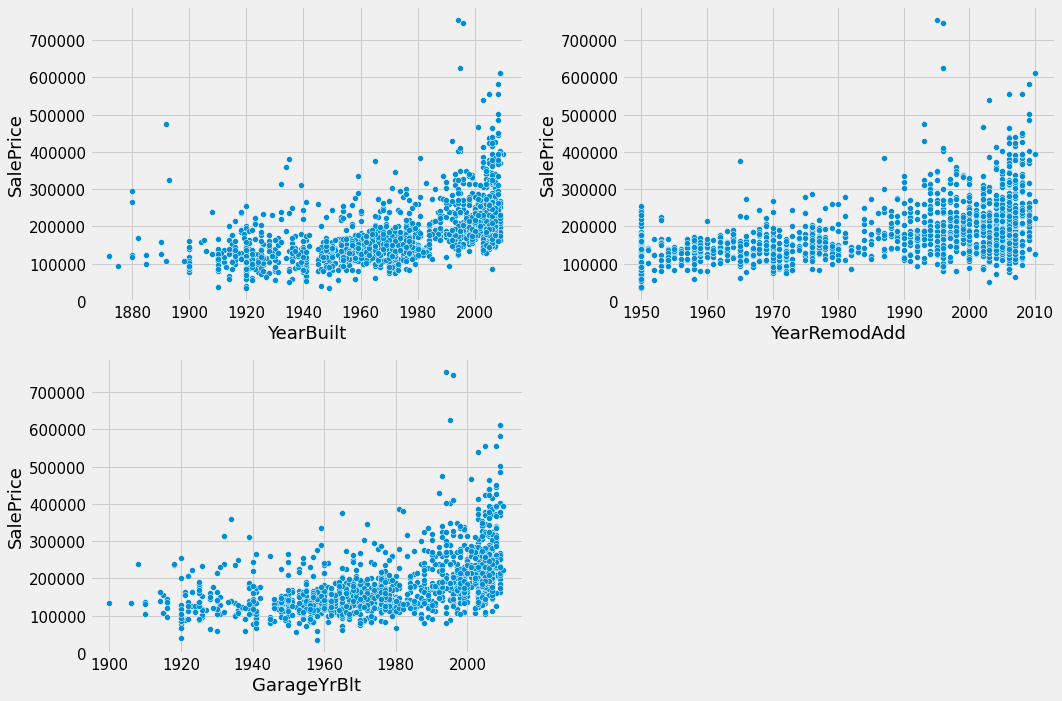

In [21]:
# Bivariate Analysis :

plt.figure(figsize=(15,10))
plotnum=1
for feature in year_feature:
    if(plotnum<=3): # ignoring year sold feature
        ax=plt.subplot(2,2,plotnum) 
        sns.scatterplot(y=df.SalePrice,x=df[feature])
    plotnum+=1
plt.tight_layout()  

>- The Sale prices are pretty much constant the early years before year 2000.
>- The Sale prices for the newly and remodeled houses are significantly higher after the year 2000.
>- The Sale prices for houses where garages were built only around year 2000 and later are higher.

# Numerical Features

In [22]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature not in year_feature+['Id']] #list
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  33


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  SalePrice  
0         0        0       2     208500  
1         0        0       5     181500  
2         0        0       9     223500  
3         0        0       2     140000  
4         0        0      12     250000

`Note` : <font color='chocolate'>Some features are actually categorical here such as 'MSSubClass','OverallCond','OverallQual','MoSold'. For now we will just analyse them and convert them into categorical in the FE Section</font>

# Discrete Features

In [23]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [24]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [25]:
df[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

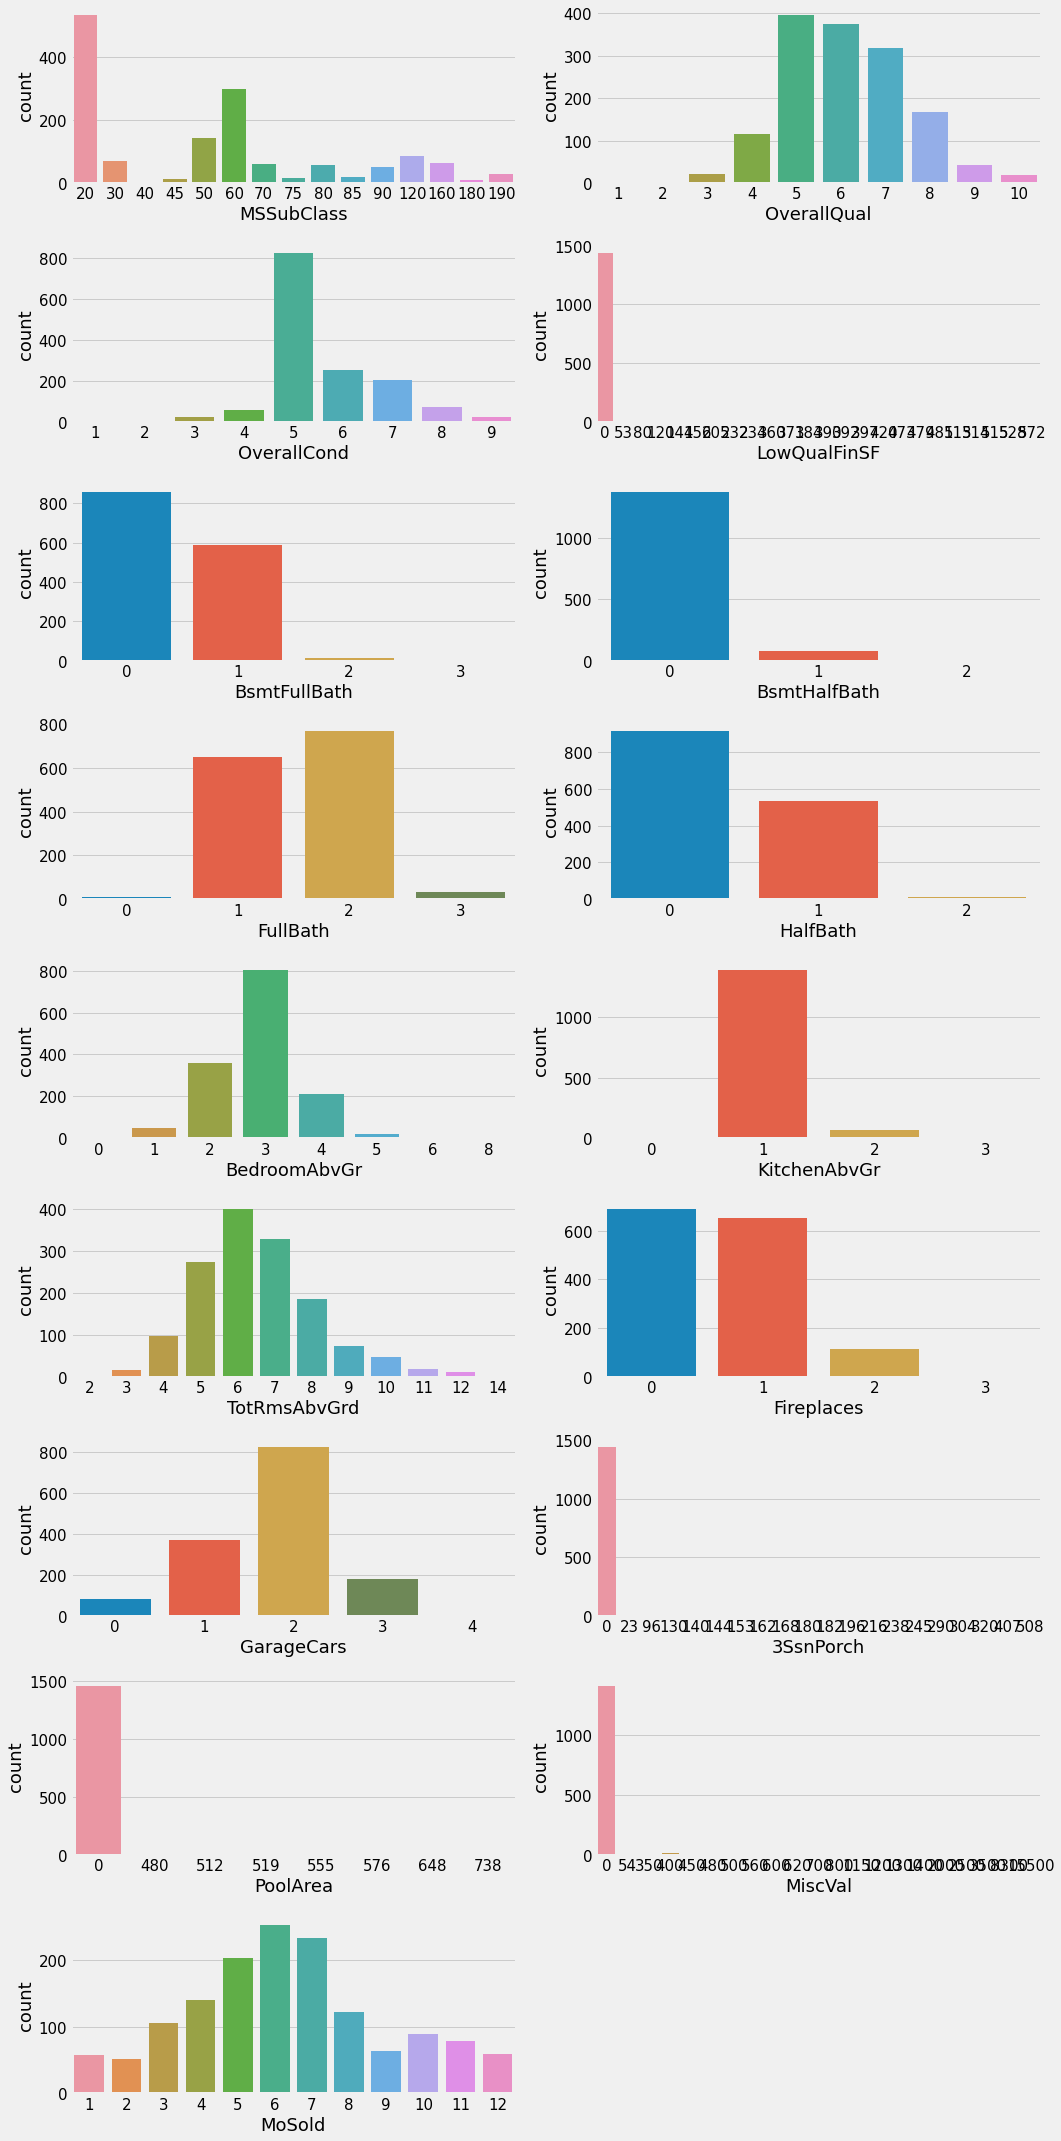

In [26]:
# Univariate Analysis :

plt.figure(figsize=(15,30))
plotnum=1
for feature in discrete_feature:
    if(plotnum<=17):
        ax=plt.subplot(9,2,plotnum) 
        sns.countplot(df[feature])
    plotnum+=1
plt.tight_layout()  

>- The number of houses having about average overall quality and overall condition are high in number
>- Most houses do not have full or half bathrooms in their basements
>- Most have upto 2 bathrooms in their house.
>- Houses having 3 bedrooms are more in number.
>- Most houses have only 1 kitchen.
>- Most houses have 0 or only 1 Fire place.
>- Most houses have garages where they can keep 2 cars in it.
>- Houses are sold mostly in the month of June and July.

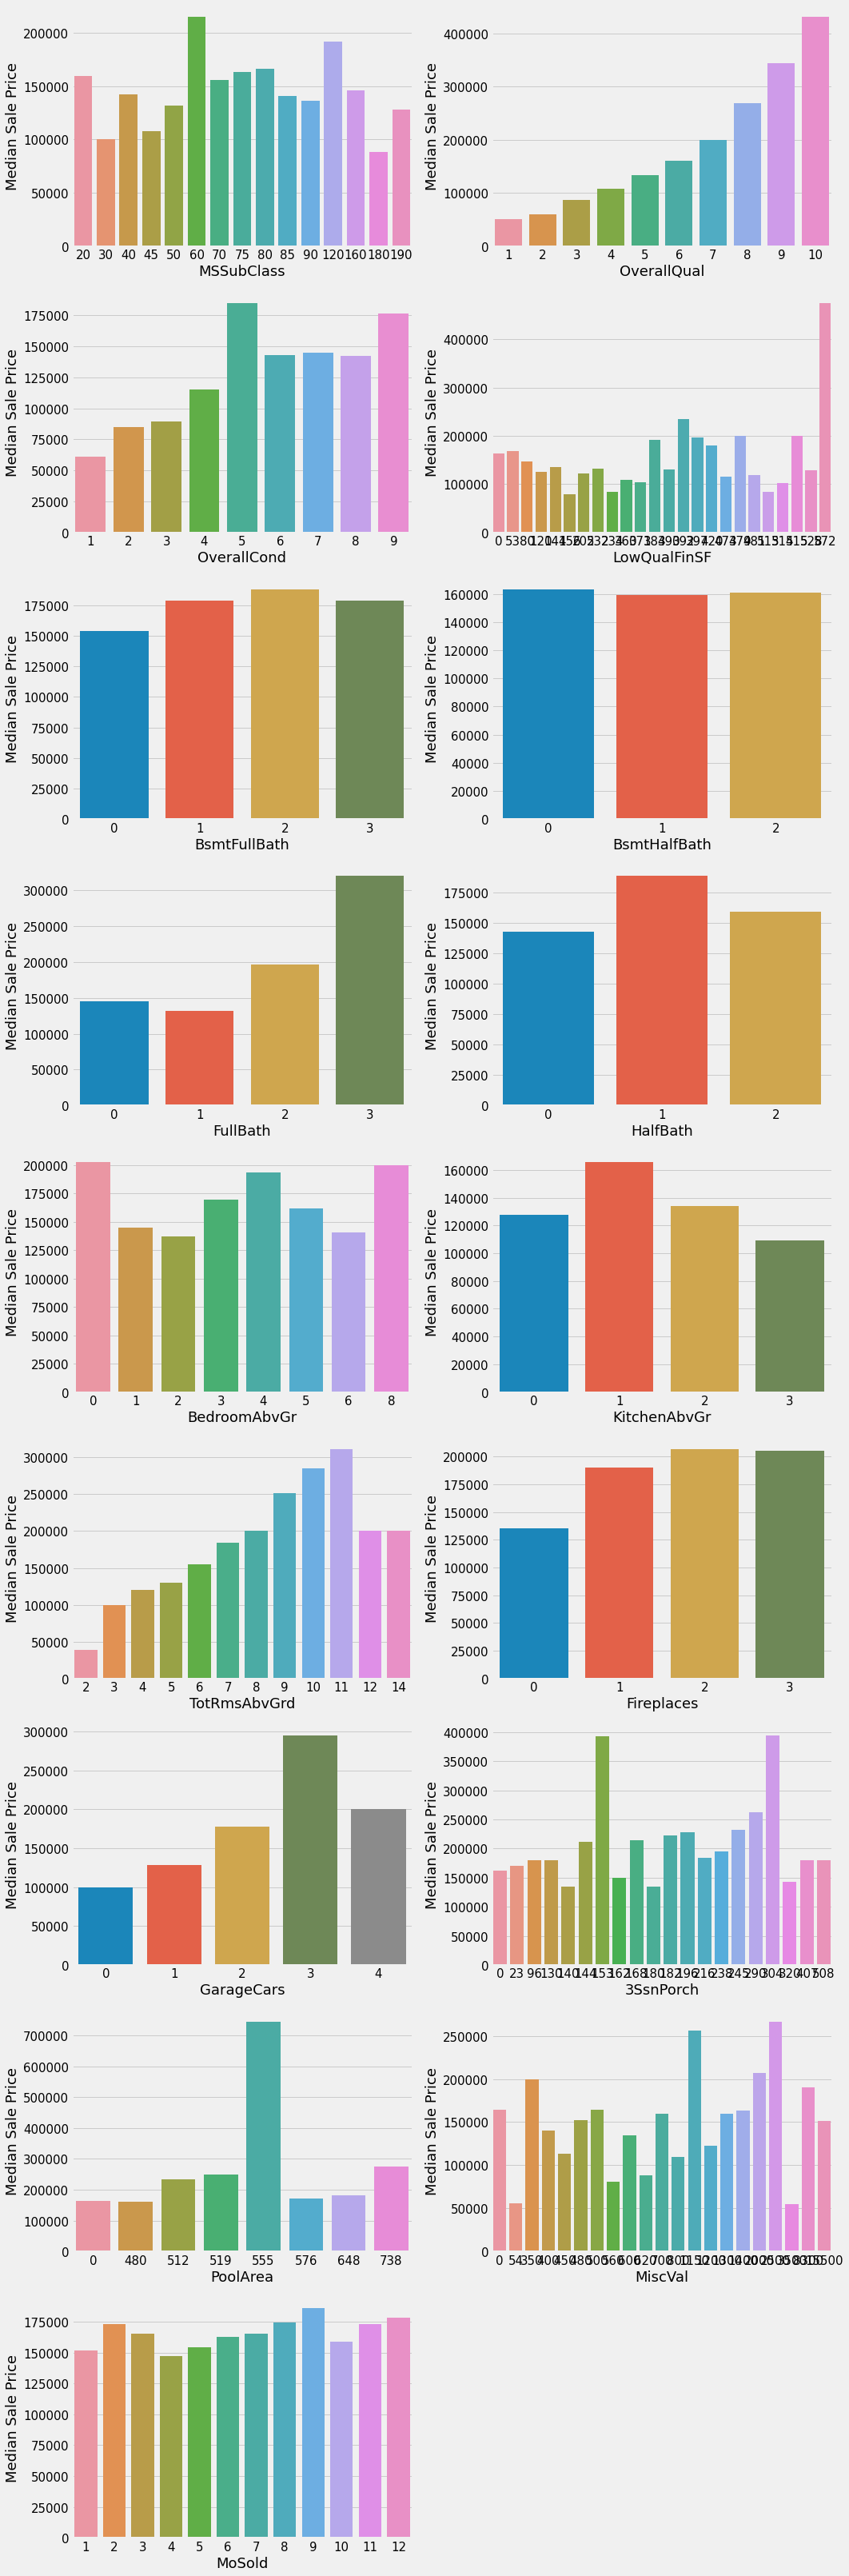

In [27]:
# Bivariate Analysis : 

plt.figure(figsize=(15,45))
plotnumber = 1

for feature in discrete_feature:
    data=df.copy() 
    data = pd.DataFrame(data.groupby(feature)['SalePrice'].median())
    data.index = [str(x) for x in data.index]
    if plotnumber<=17 :
        ax = plt.subplot(9,2,plotnumber)
        sns.barplot(x=data.index, y=data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Median Sale Price')
    plotnumber+=1
plt.tight_layout()

>- Overall quality vs sales price exponential rise(monocronic relationship) i.e, As the Quality Inceases, Price Increase.
>- Sale Price increase by 50% if No. of Full bathrooms are 3.
>- As the Number of rooms increases, sale price increases.
>- Sale price is low if a house doesn't have a Fire Place.
>- Sale price is the highest if the number of cars you can keep in garage is 3.
>- Some features which do not contribute to much change in sale prices are : BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,PoolArea,MoSold

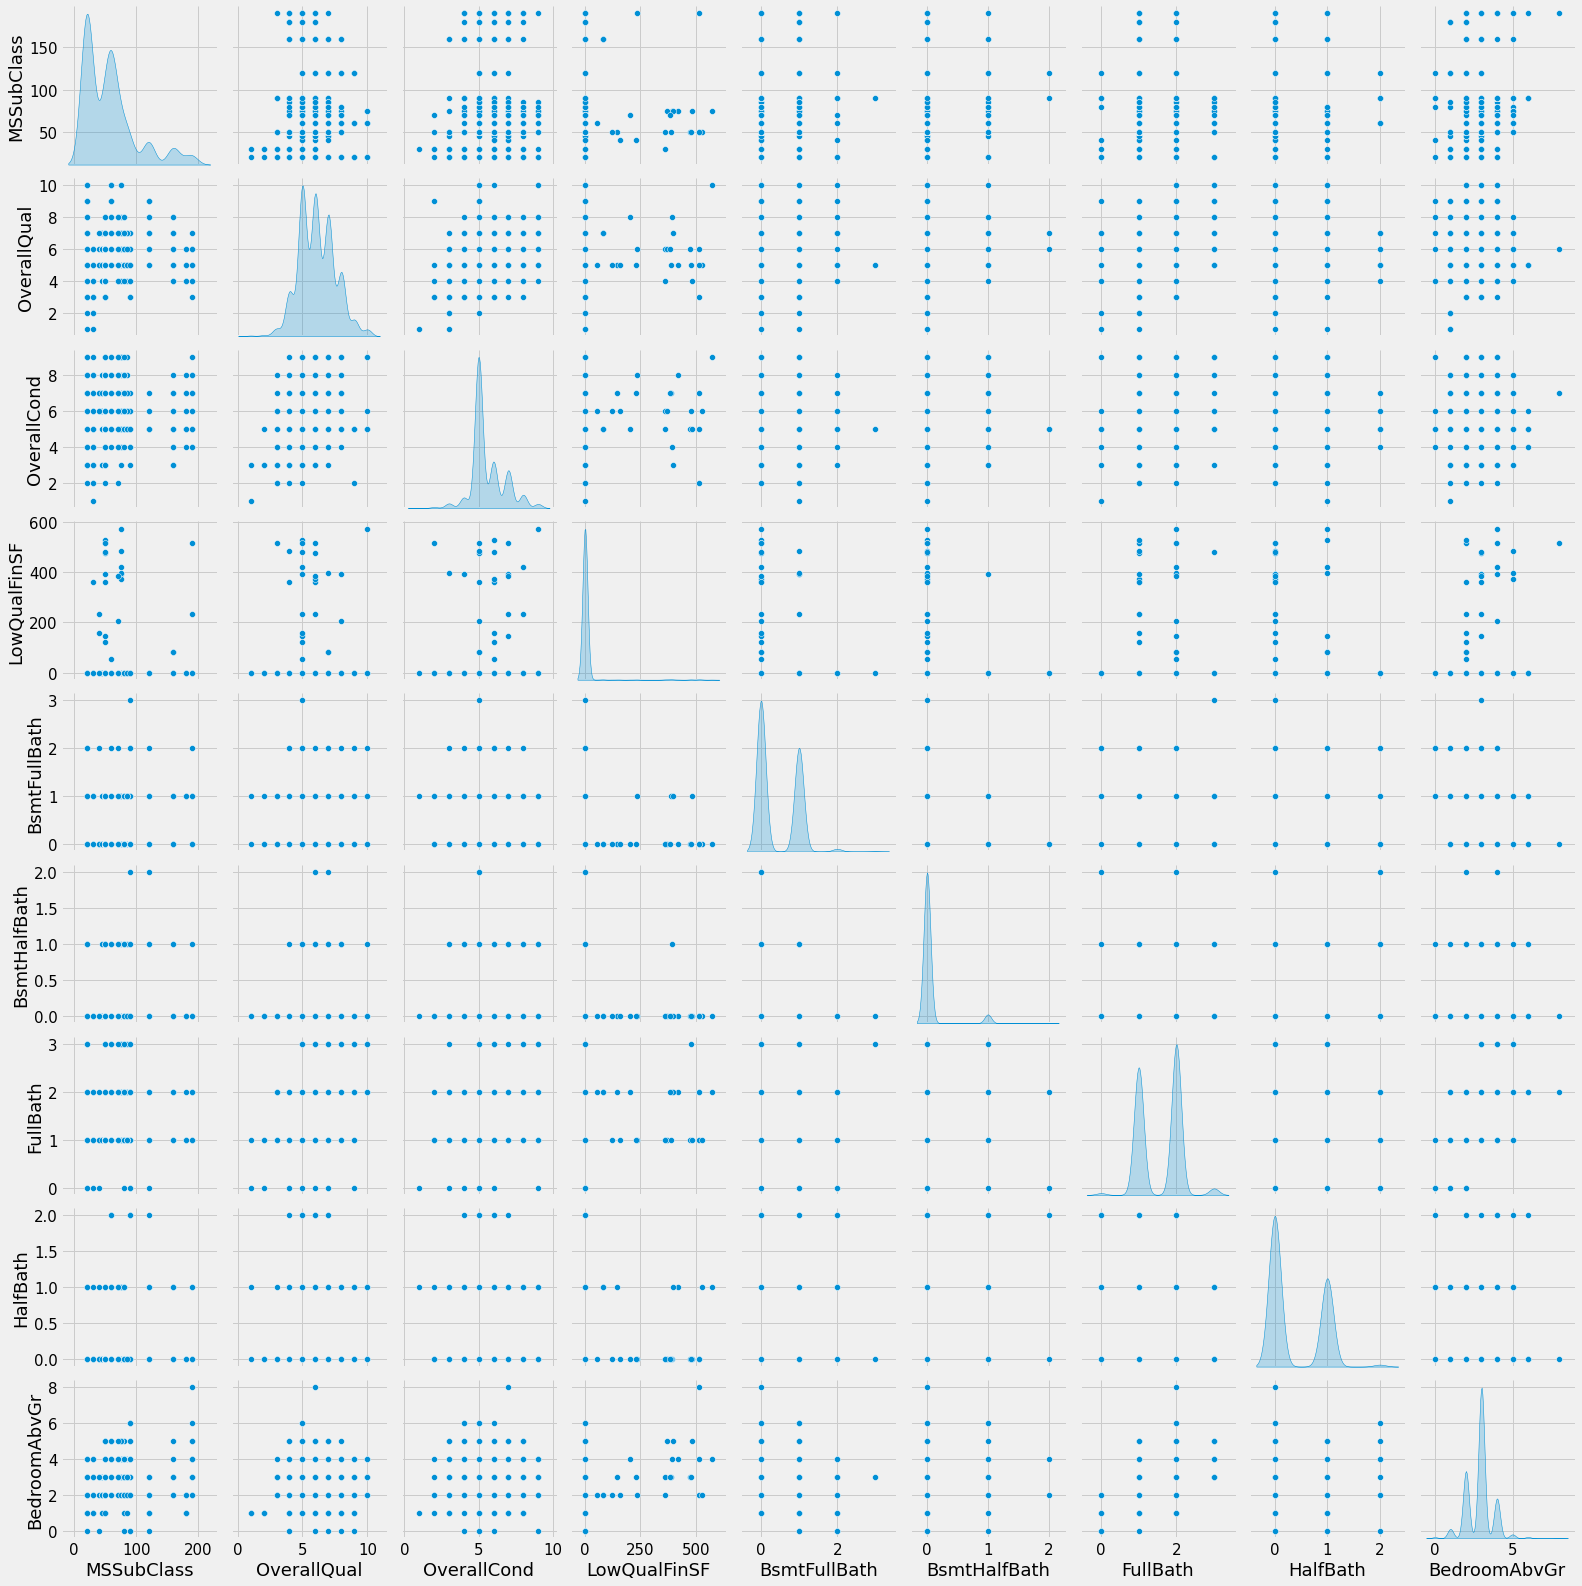

In [28]:
# Multivariate Analysis :

# Splitting into 2 dataframes
data1=df[discrete_feature].copy()
data1=data1.iloc[:,:9]
sns.pairplot(data1,diag_kind ='kde',kind ='scatter')

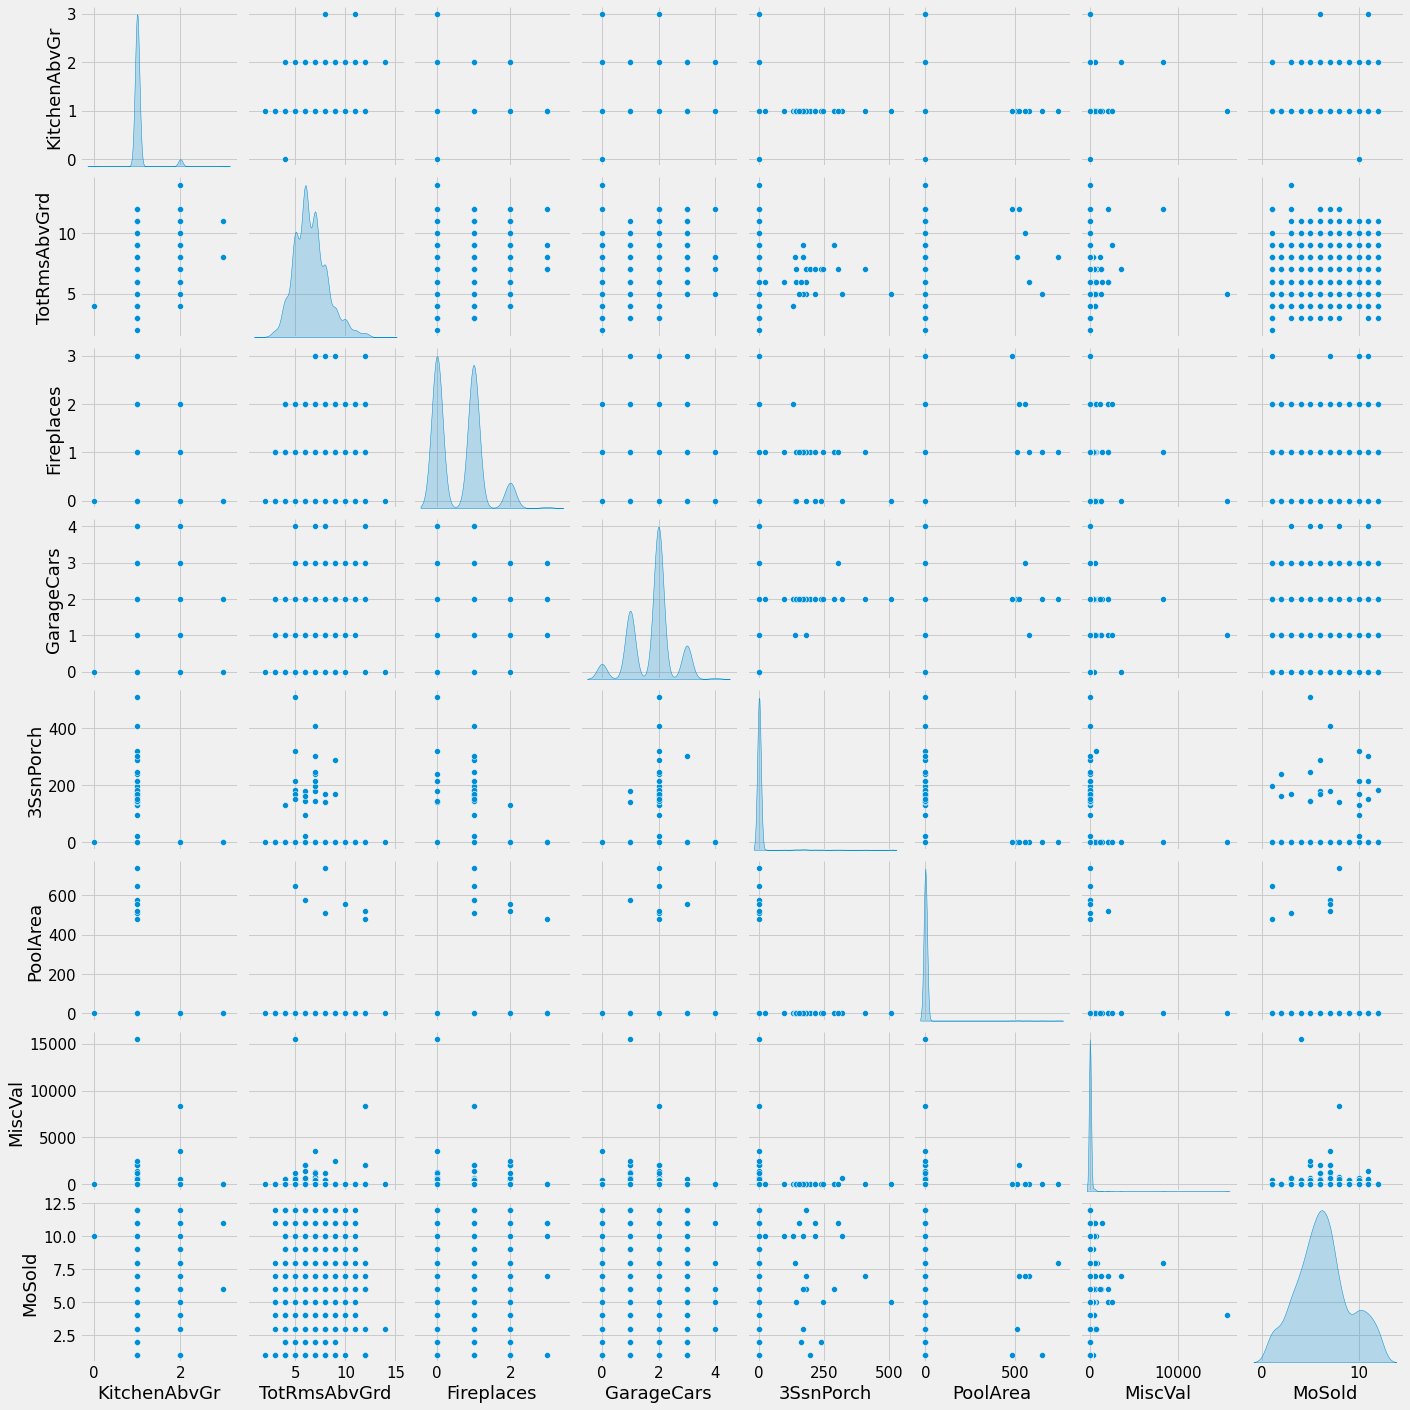

In [29]:
data2=df[discrete_feature].copy()
data2=data2.iloc[:,9:]
sns.pairplot(data2,diag_kind ='kde',kind ='scatter')

>- There a quiet a few features that show some sort of relationship with the other idependent feature
>- We will explore a little more on this in the Correlation part  

# Continuous Features

In [30]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count: {}".format(len(continuous_feature)))

Continuous feature Count: 16


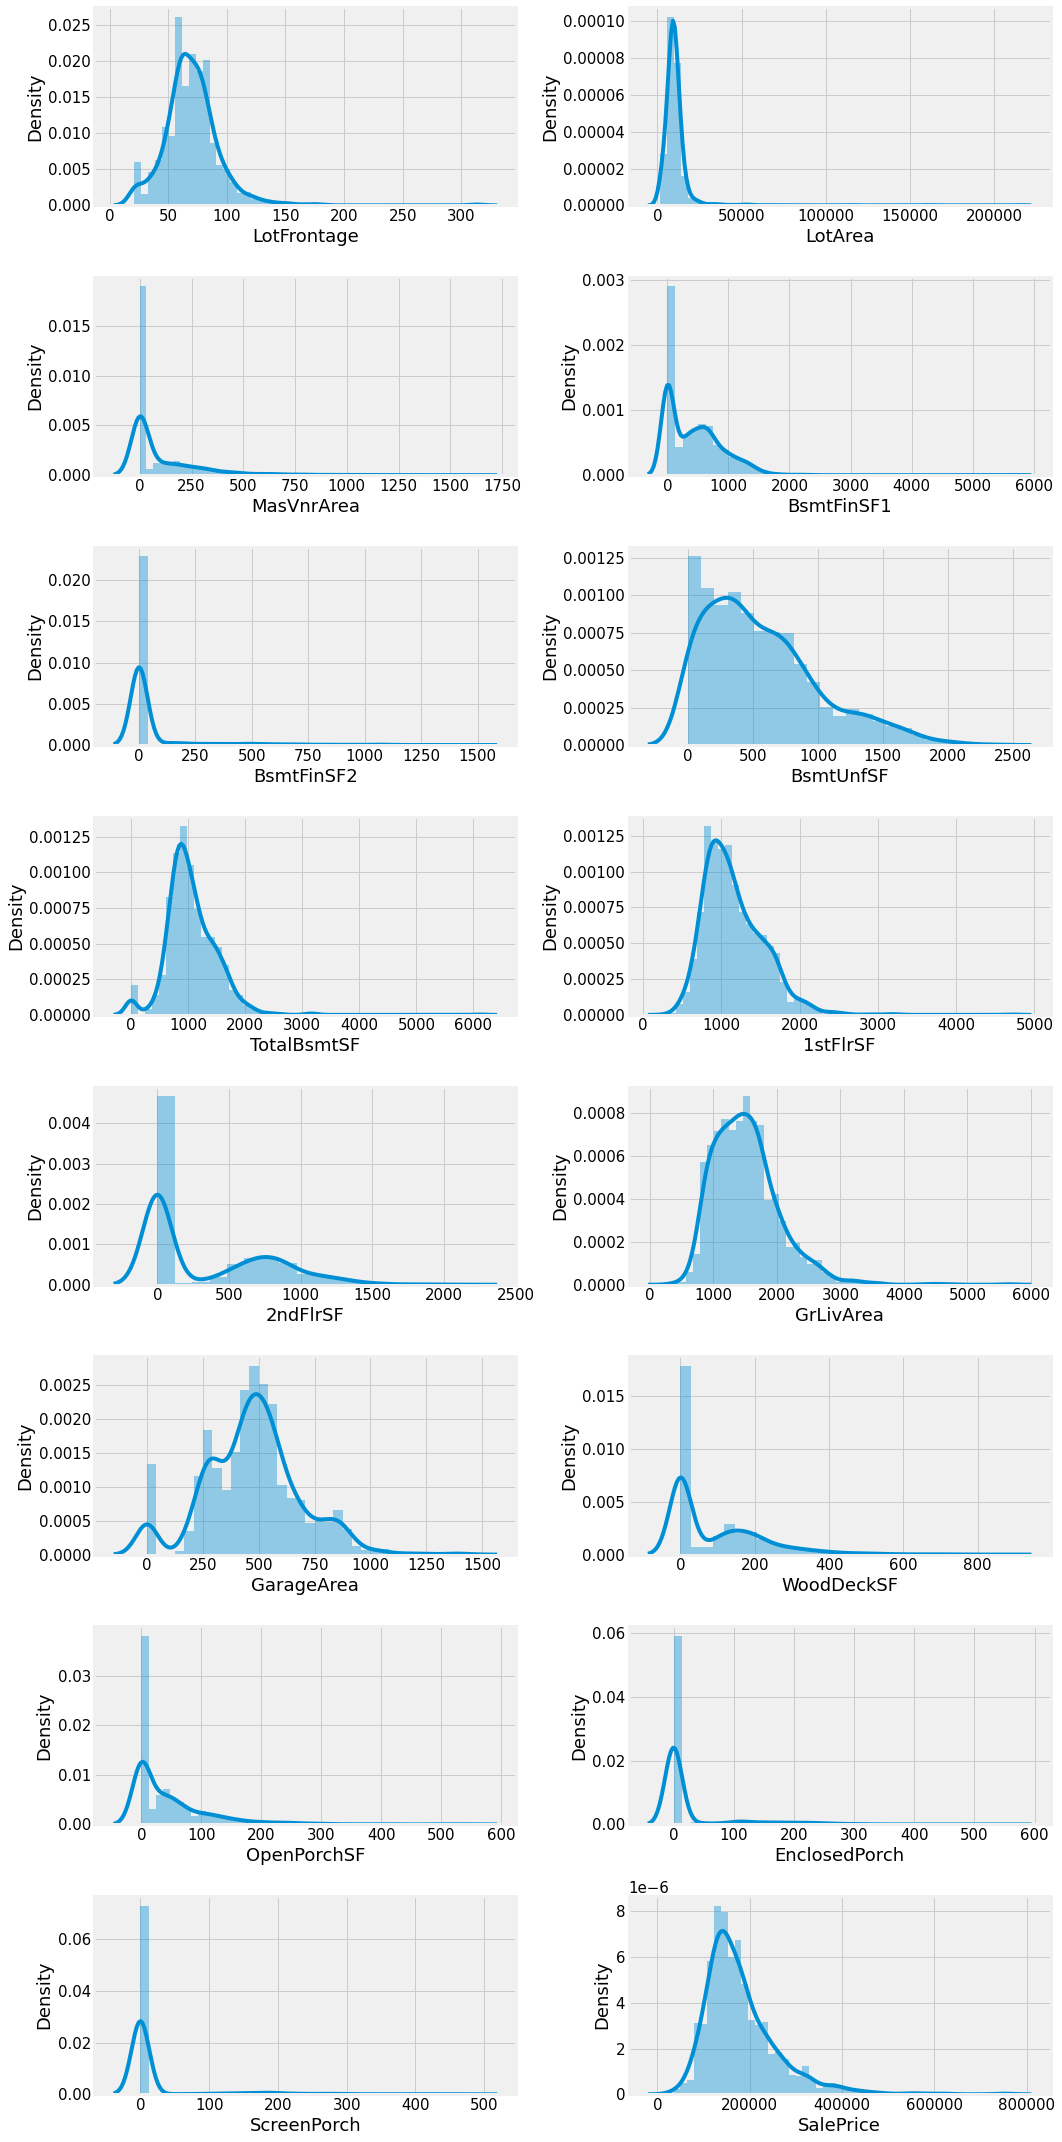

In [31]:
# Univariate Analysis :

plt.figure(figsize=(15,30),facecolor='white')
plotnum=1
for feature in continuous_feature:
    if(plotnum<=16):
        ax=plt.subplot(8,2,plotnum) 
        sns.distplot(df[feature])
    plotnum+=1
plt.tight_layout()  

>- Most features are Right-Skewed.
>- That means there are lot of outliers in the data.
>- Amount of Street connected to the property is around 50-100 sqft range.
>- As known generally and also verified from the graphs, Basement And 1st Floor Sqft's are identical.
>- Garage area of most houses is around 500 sqft.
>- Houses are mostly sold in the range 120K - 220K dollars.

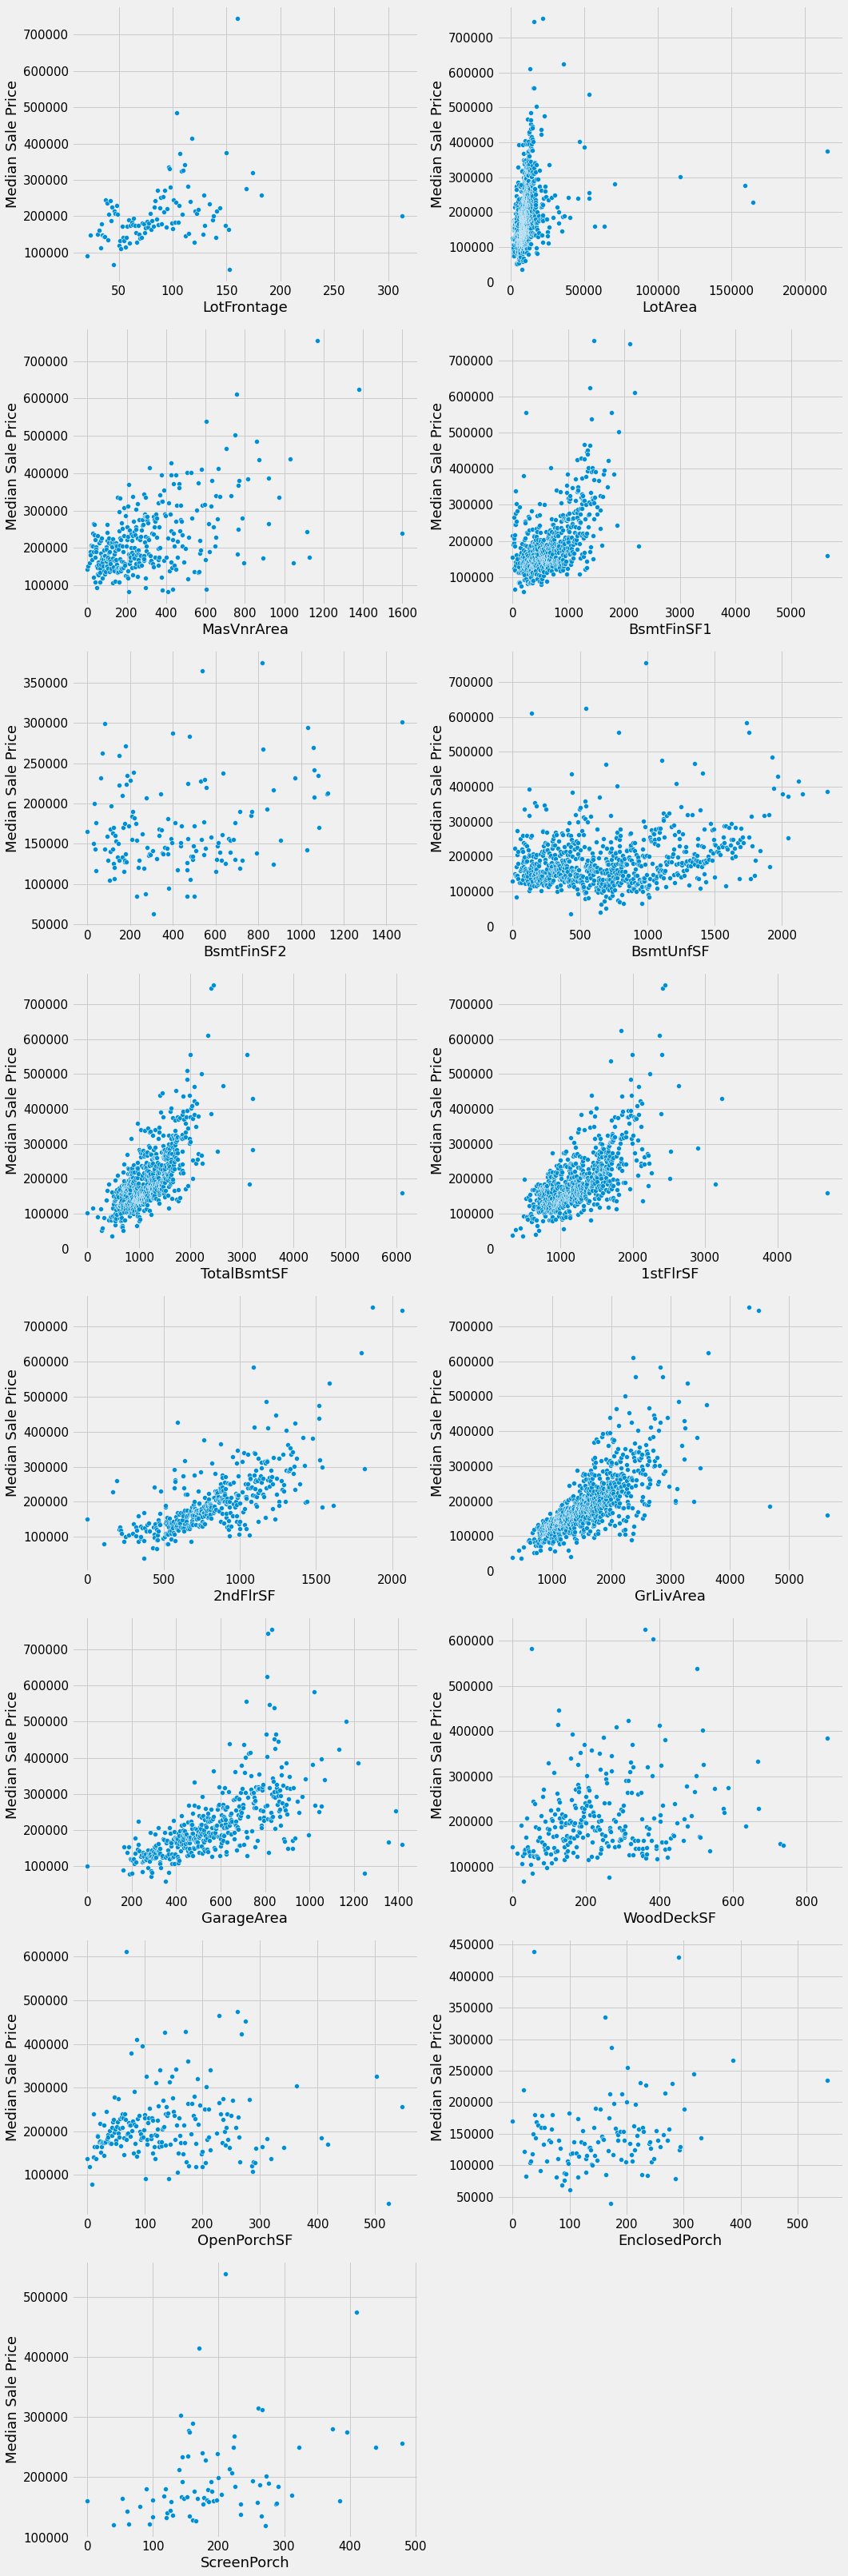

In [32]:
# Bivariate Analysis : 

plt.figure(figsize=(15,45))
plotnumber = 1

for feature in continuous_feature:
    data=df.copy() 
    data = pd.DataFrame(data.groupby(feature)['SalePrice'].median())
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.scatterplot(x=data.index, y=data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Median Sale Price')
    plotnumber+=1
plt.tight_layout()

>- Many features show a linear relationship with SalePrice.
>- As plot sqft increases, Sale Price increases.
>- As living area increases, the Sales Price increases. 
>- As garage area increases, the Sales Price increases. 
>- As Porch area increases, Price Increases.

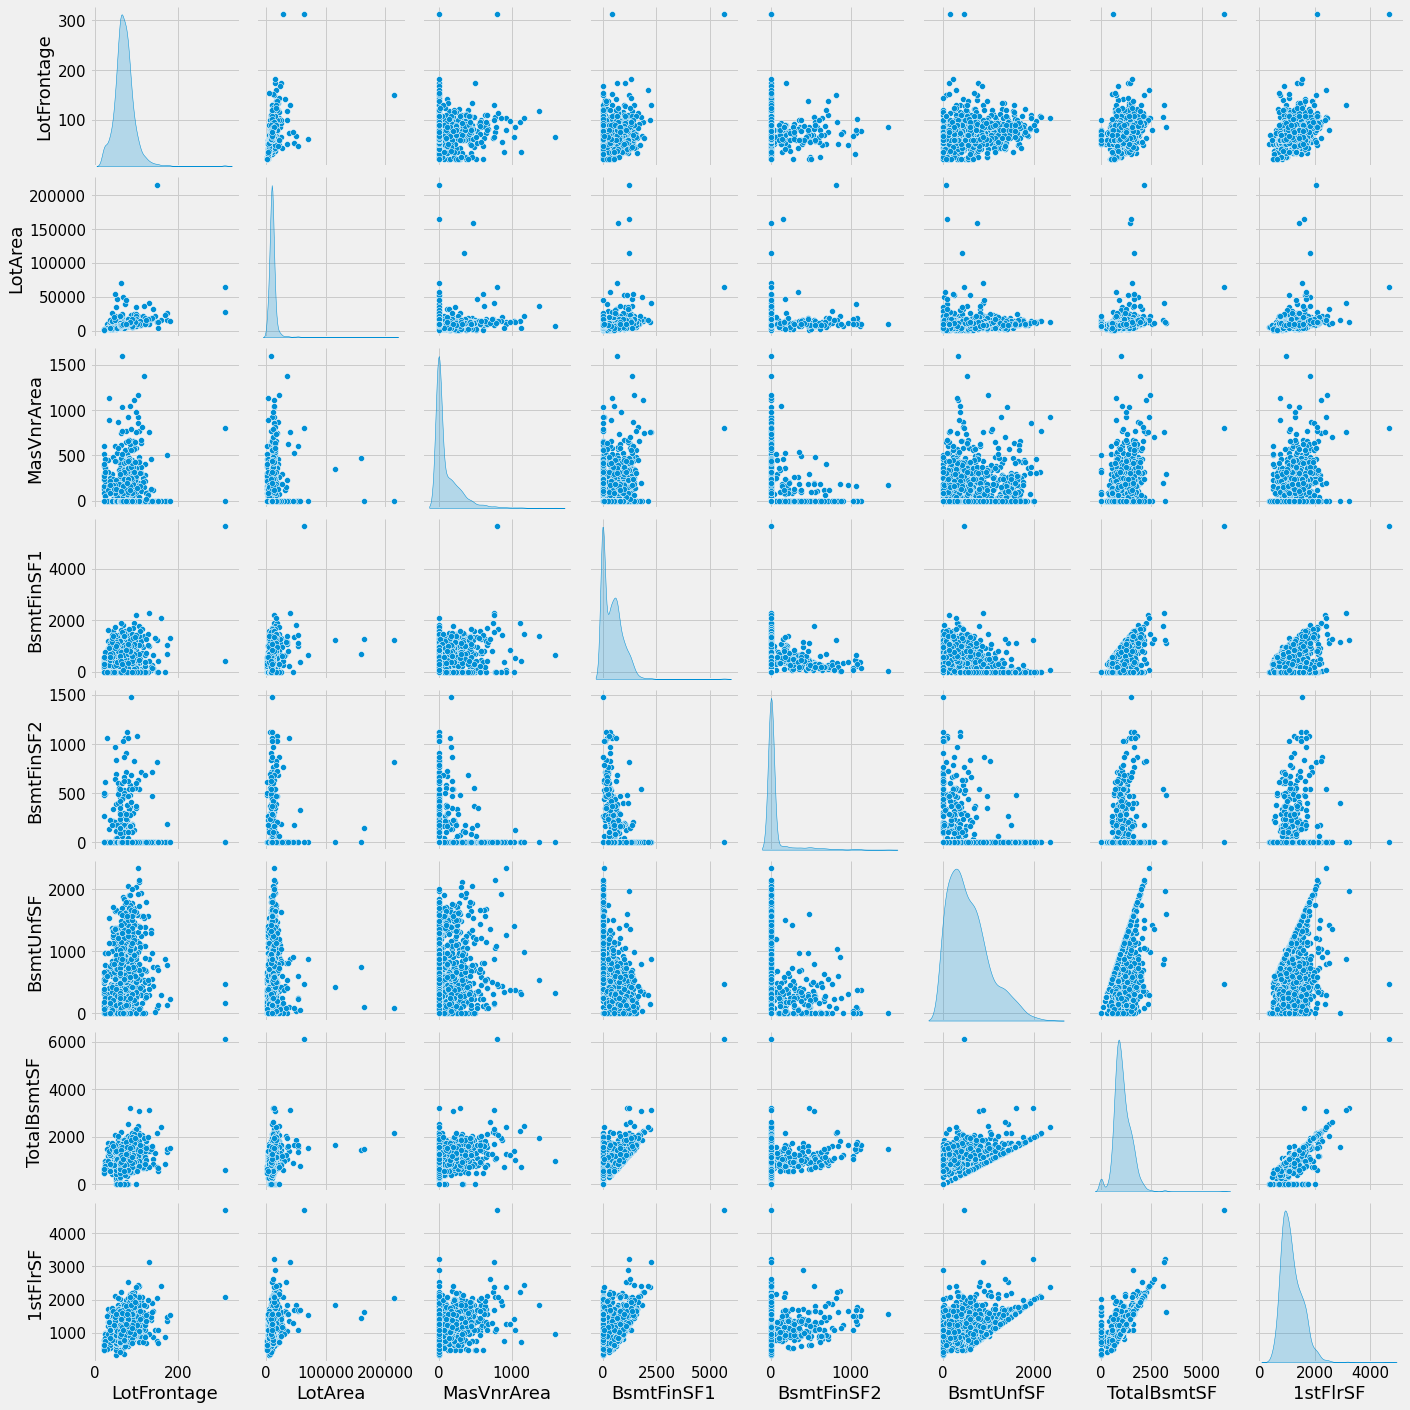

In [33]:
# Multivariate Analysis : 

# Splitting into 2 dataframes
data3=df[continuous_feature].copy()
data3=data3.iloc[:,:8]
sns.pairplot(data3,diag_kind ='kde',kind ='scatter')

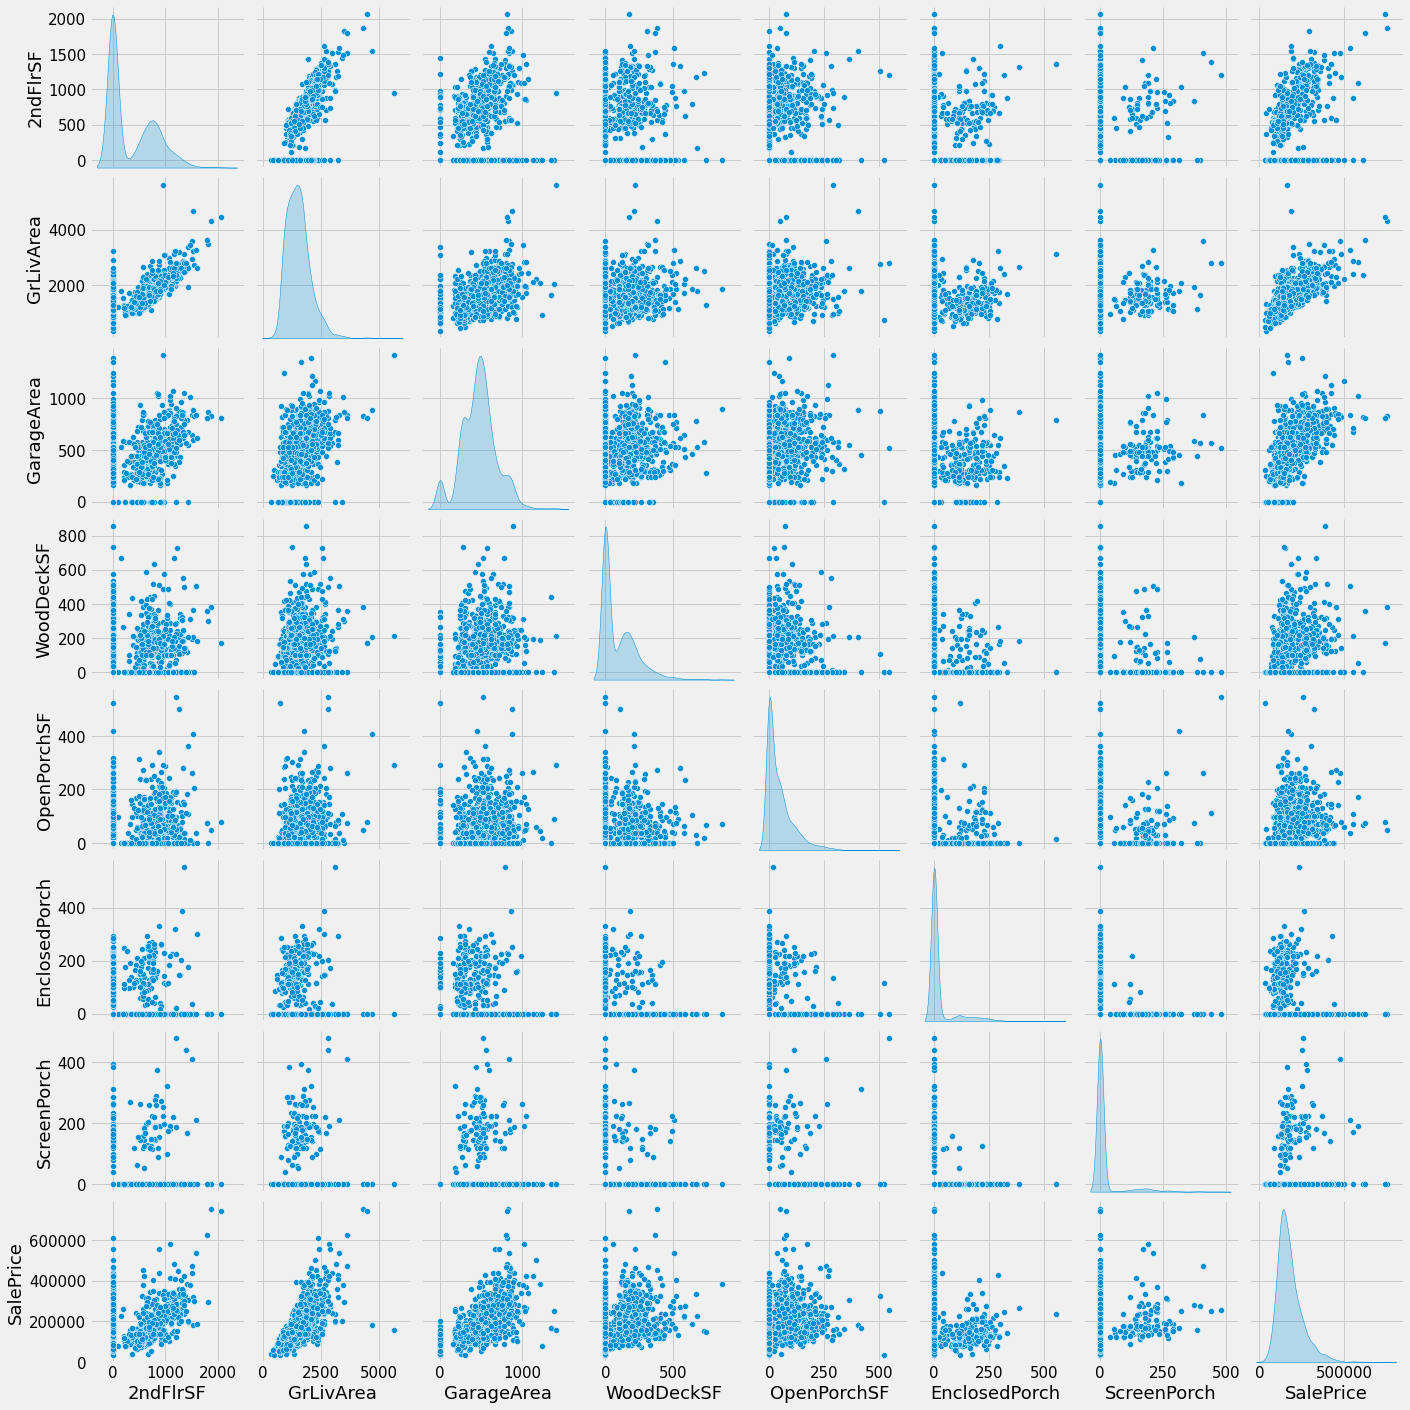

In [34]:
data4=df[continuous_feature].copy()
data4=data4.iloc[:,8:]
sns.pairplot(data4,diag_kind ='kde',kind ='scatter')

>- There a quiet a few features that show some sort of relationship with the other idependent feature
>- We will explore a little more on this in the Correlation part  

# Categorical Features

In [35]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [36]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

>Some features have high cardinality

In [37]:
print(len(categorical_features))

43


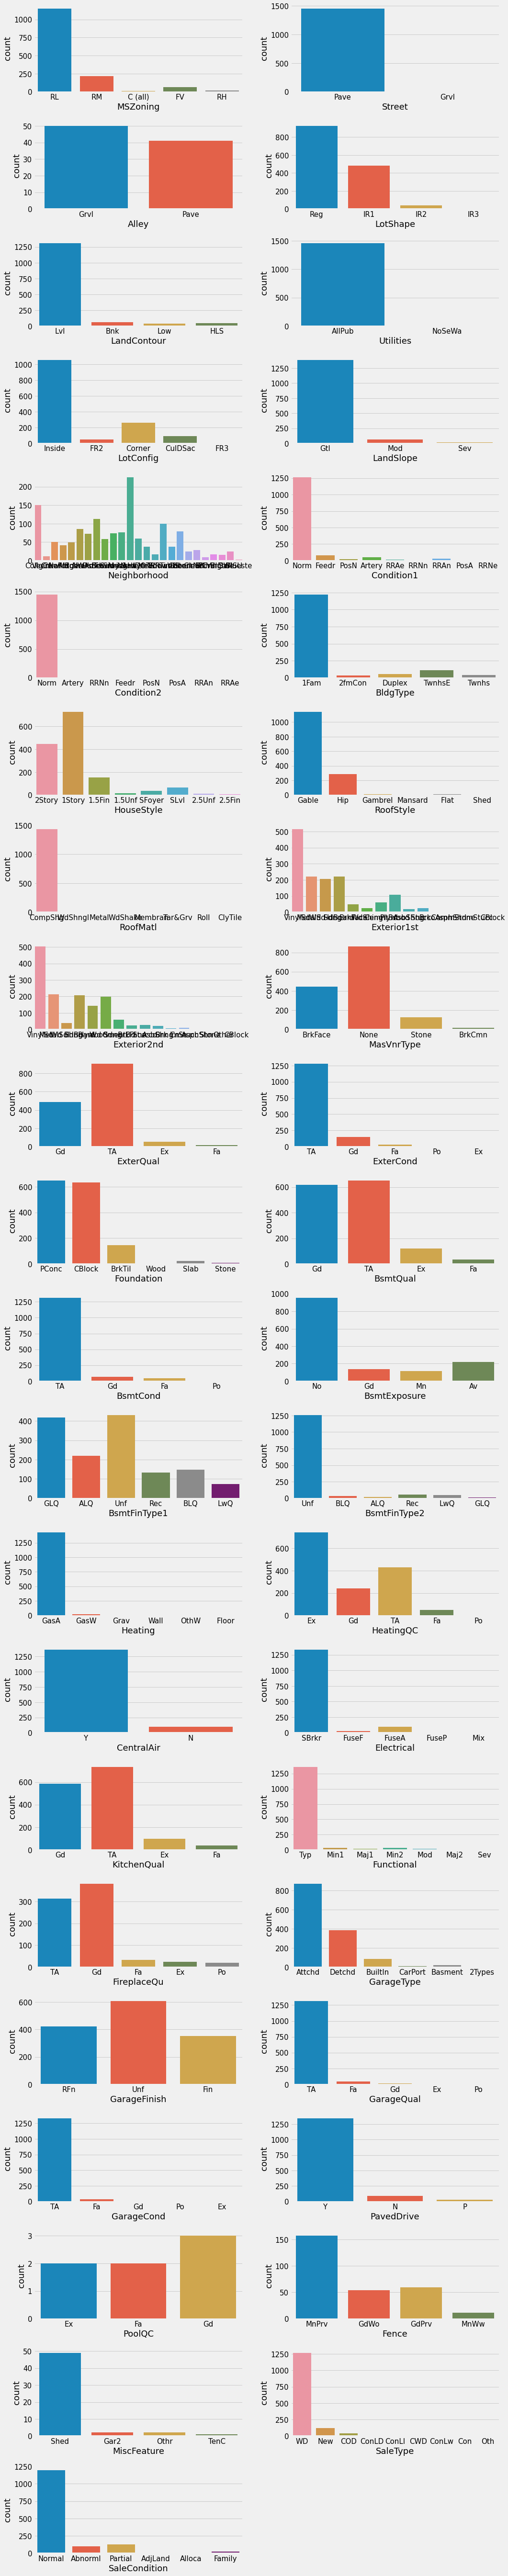

In [38]:
# Univariate Analysis :

plt.figure(figsize=(15,75))
plotnum=1
for feature in categorical_features:
    if(plotnum<=43): 
        ax=plt.subplot(22,2,plotnum) 
        sns.countplot(df[feature])
    plotnum+=1
plt.tight_layout()  

>- Streets mostly had pavements.
>- Land Counters in most places were level.
>- House style were mostly within 2 story buildings.
>- Basement quality of most houses were good.
>- Many houses didn't have Basement Exposure
>- Many houses had AC installed.
>- Kitchen quality of most houses were good.
>- Many houses had attached garage.
>- Those houses who had pool, generally their codition was good.

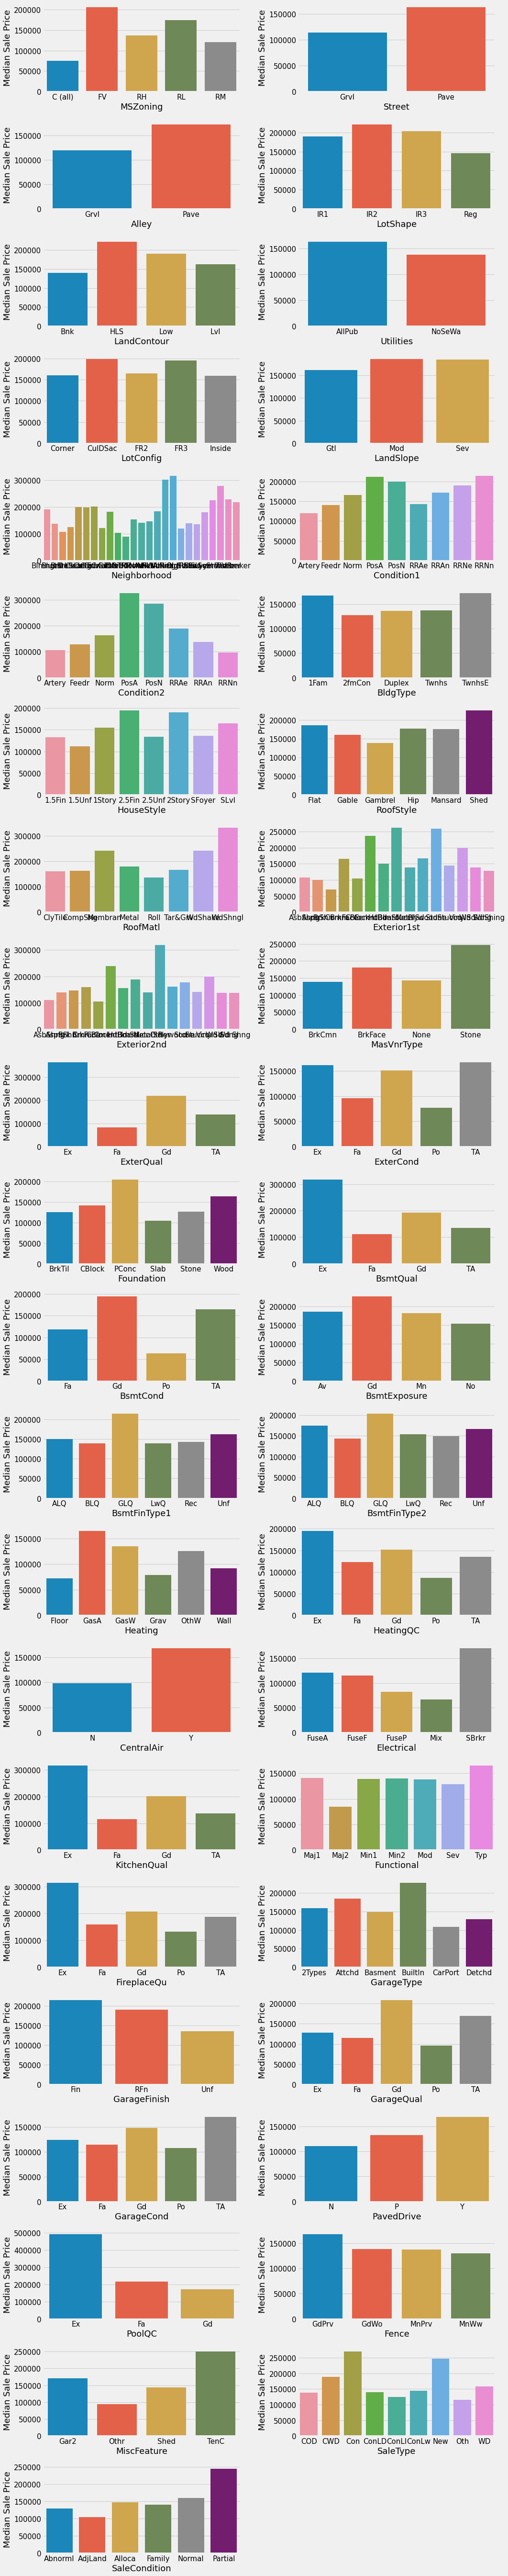

In [39]:
# Bivariate Analysis : 

plt.figure(figsize=(15,75))
plotnumber = 1

for feature in categorical_features:
    data=df.copy() 
    data = pd.DataFrame(data.groupby(feature)['SalePrice'].median())
    if plotnumber<=43 :
        ax = plt.subplot(22,2,plotnumber)
        sns.barplot(x=data.index, y=data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Median Sale Price')
    plotnumber+=1
plt.tight_layout()

>-  Having AC definitely escalates price of house.
>- Having 1 Kitchen of Excellent quality hikes house price like anything.
>- A few houses which had good basement exposure their sale price was high.
>- Lot of demand for built in house, hence sale price high.
>- Houses rarely had fences, so those who wanted them had to pay the big bucks.
>- For many of the categorical there is no strong relation to the target.
>- Having 2 fireplaces increases house price and fireplace of Excellent quality is a big plus.

# Inspecting SalePrice - Target Variable 

In [40]:
np.mean(df['SalePrice'])

180921.19589041095

In [41]:
np.std(df['SalePrice'])

79415.29188606751

In [42]:
#skewness and kurtosis
print("Skewness: " + str(df['SalePrice'].skew()))
print("Kurtosis: " + str(df['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [43]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('Probability Plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(df, 'SalePrice')

>These three charts above can tell us a lot about our target variable.
>* Our target variable, SalePrice is not normally distributed.
>* Our target variable is right-skewed. 
>* There are multiple outliers in the variable.

# Applying Log Transformation and checking Skewness and Kurtosis of sale price

In [44]:
for feature in continuous_feature:
    if feature!='SalePrice':
        pass
    else:
        data=df.copy()
        data[feature]=np.log1p(data[feature])
        plotting_3_chart(data, 'SalePrice')
        #skewness and kurtosis
        print("Skewness: " + str(data['SalePrice'].skew()))
        print("Kurtosis: " + str(data['SalePrice'].kurt()))

Skewness: 0.12134661989685333
Kurtosis: 0.809519155707878


>* Our target variable, SalePrice is normally distributed now after transformation.
>* We will use this in the FE section
>- Taking log enures that errors in predicting expensive houses and cheap houses will affect the result equally

# Checking skewness and kurtosis of other features

In [45]:
#To check for all col instead of only sales price
for feature in numerical_features:
    print('{:15}'.format(feature), # Align left Padding is given
          'Skewness: {:05.2f}'.format(df[feature].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[feature].kurt())  
         )

MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.16     Kurtosis: 017.45
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
MasVnrArea      Skewness: 02.67     Kurtosis: 010.08
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 016.40
FullBath        Skewness: 00.04     Kurtosis: -00.86
HalfBath        Skewness: 00.68     Kurtosis: -01.08
BedroomAbvGr    Skewness: 00.21     Kurtosis: 

>We will deal skewness and kurtosis of all these features in the FE Section

# Checking a few feature relationships with Sale Price after Log Transformation

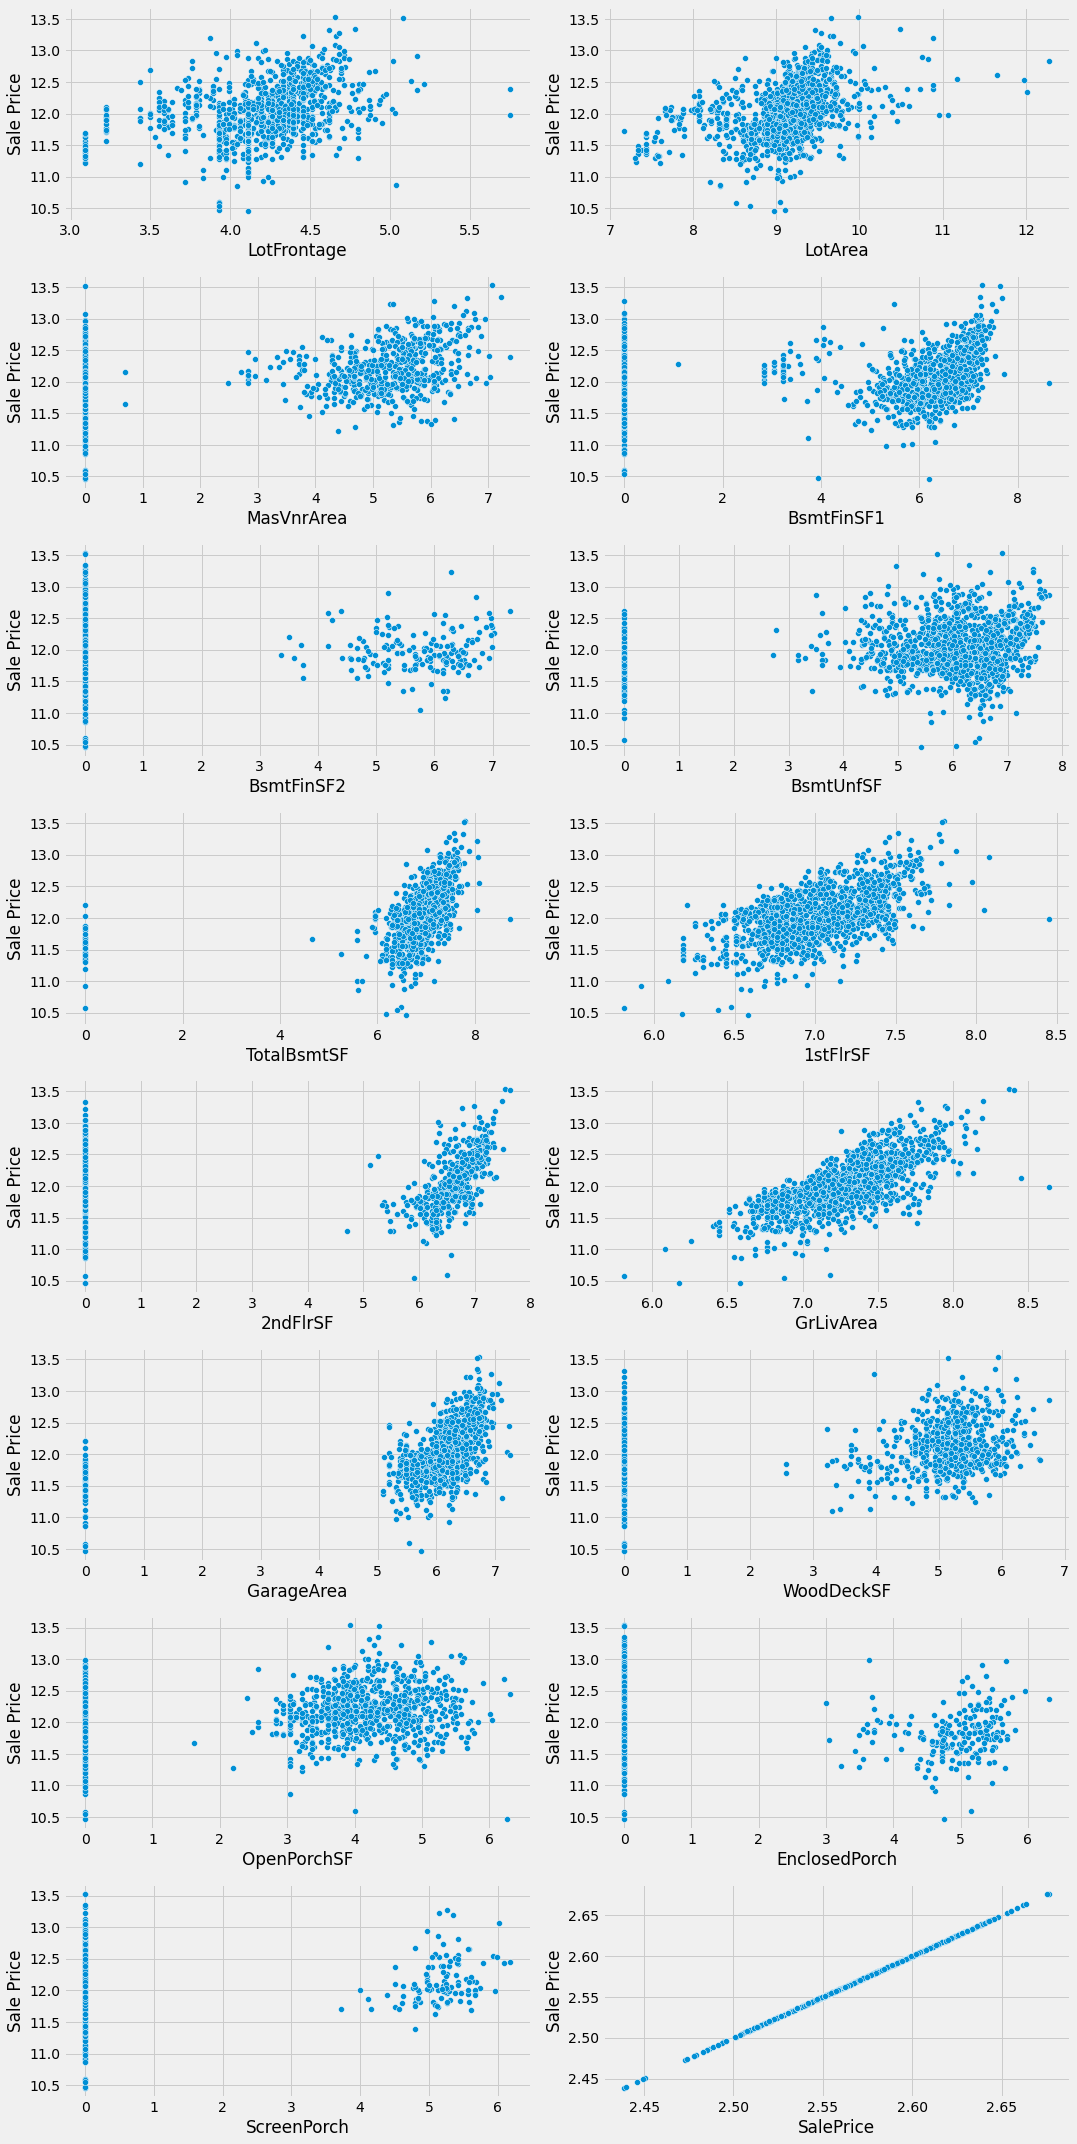

In [46]:
plt.figure(figsize=(15,30))
plotnumber = 1

for feature in continuous_feature:
    data=df.copy() 
    data[feature]=np.log1p(data[feature])
    data['SalePrice']=np.log1p(data['SalePrice'])
    if plotnumber<=16 :
        ax = plt.subplot(8,2,plotnumber)
        sns.scatterplot(x=data[feature], y=data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
    plotnumber+=1
plt.tight_layout()

>- We can certainly see some changes. 
>- There are less outliers and an increase in correlation.
>- Rest of the log transformation done in FE part. 

## Outlier Analysis After applying Log Transformation 

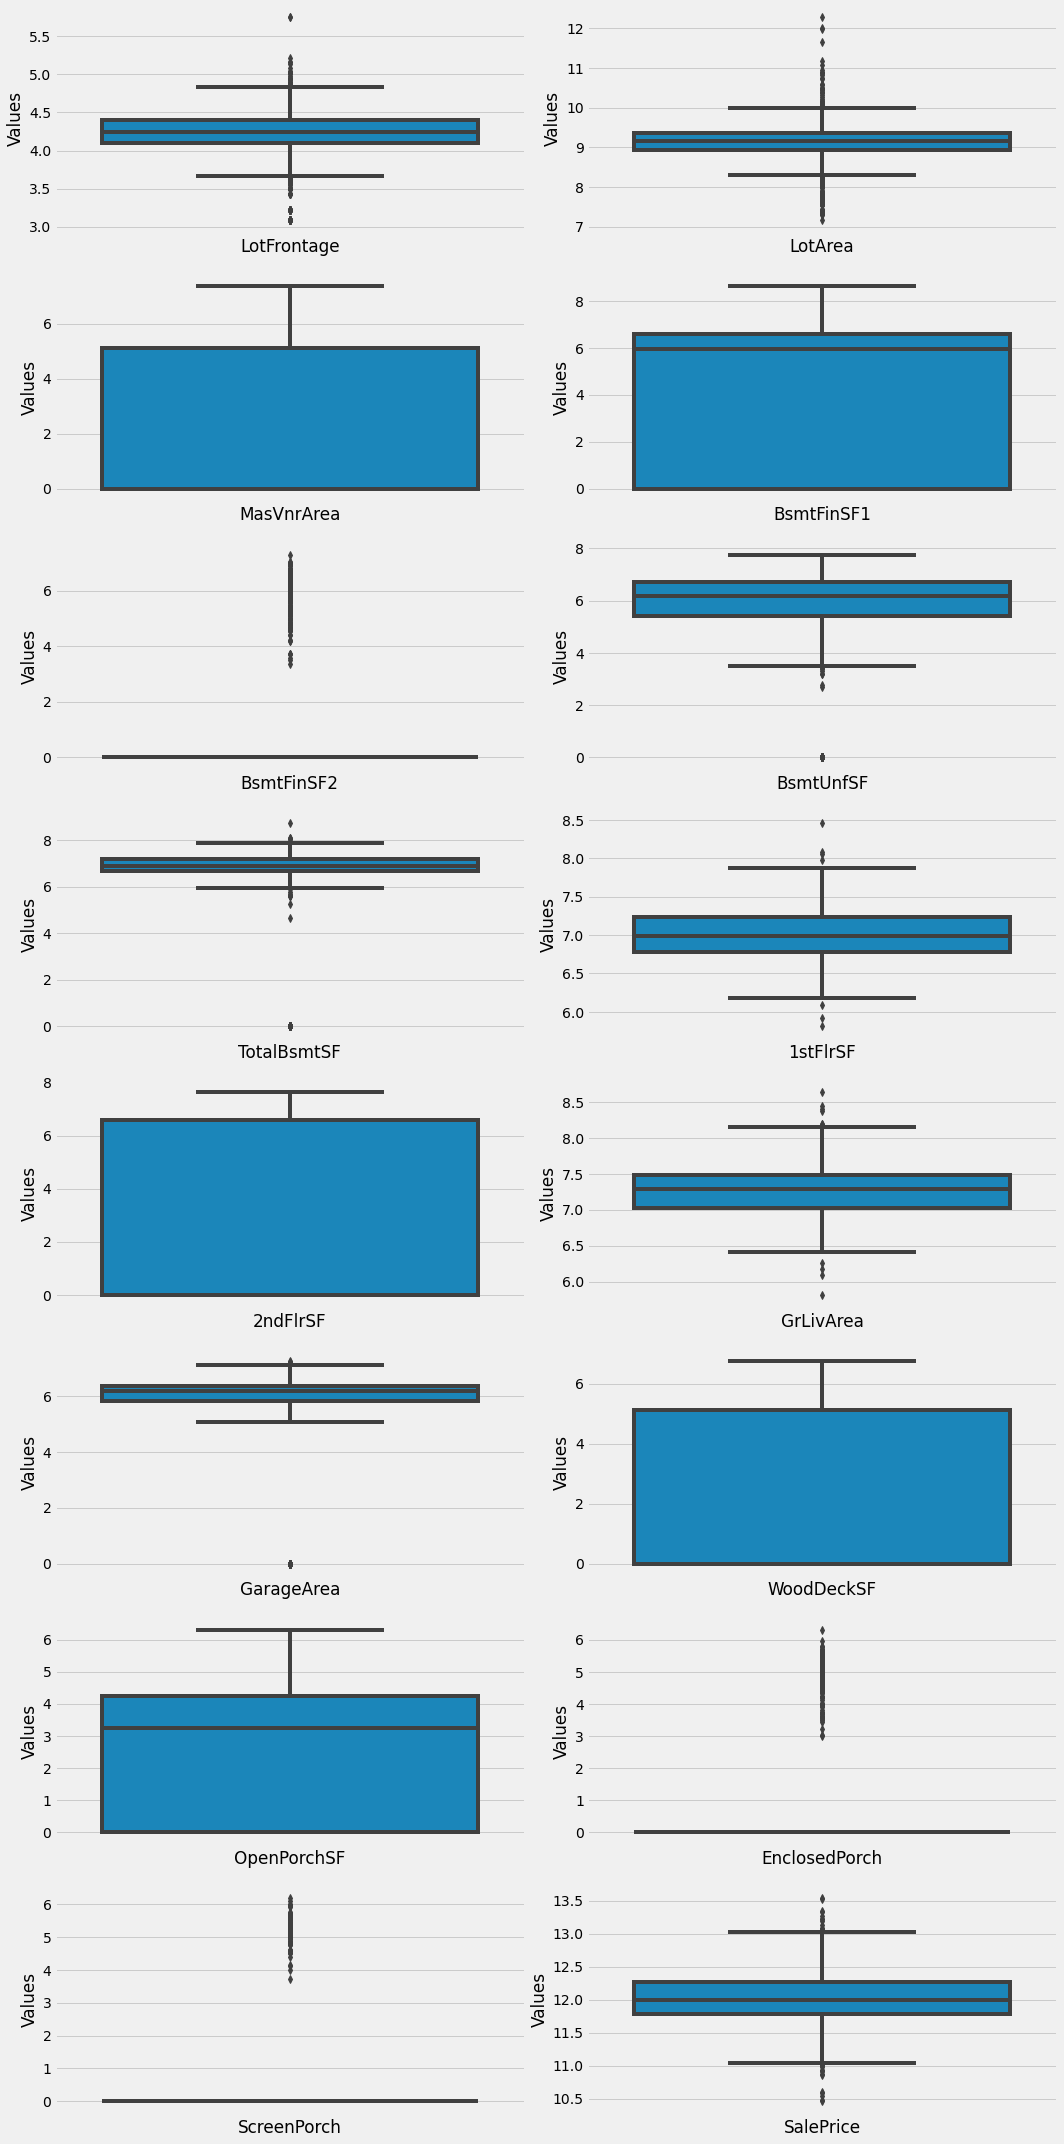

In [47]:
plt.figure(figsize=(15,30))
plotnumber = 1

for feature in continuous_feature:
    data=df.copy() 
    data[feature]=np.log1p(data[feature])
    if plotnumber<=16 :
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(data=data, y=data[feature])
        plt.xlabel(feature)
        plt.ylabel('Values')
    plotnumber+=1
plt.tight_layout()

>- As you can see there are this outliers in many features even after transformation
>- We will have to see what impact this will have in model performance
>- There are few outliers which have to be removed/replaced, will do this the FE Section

## Heatmap 

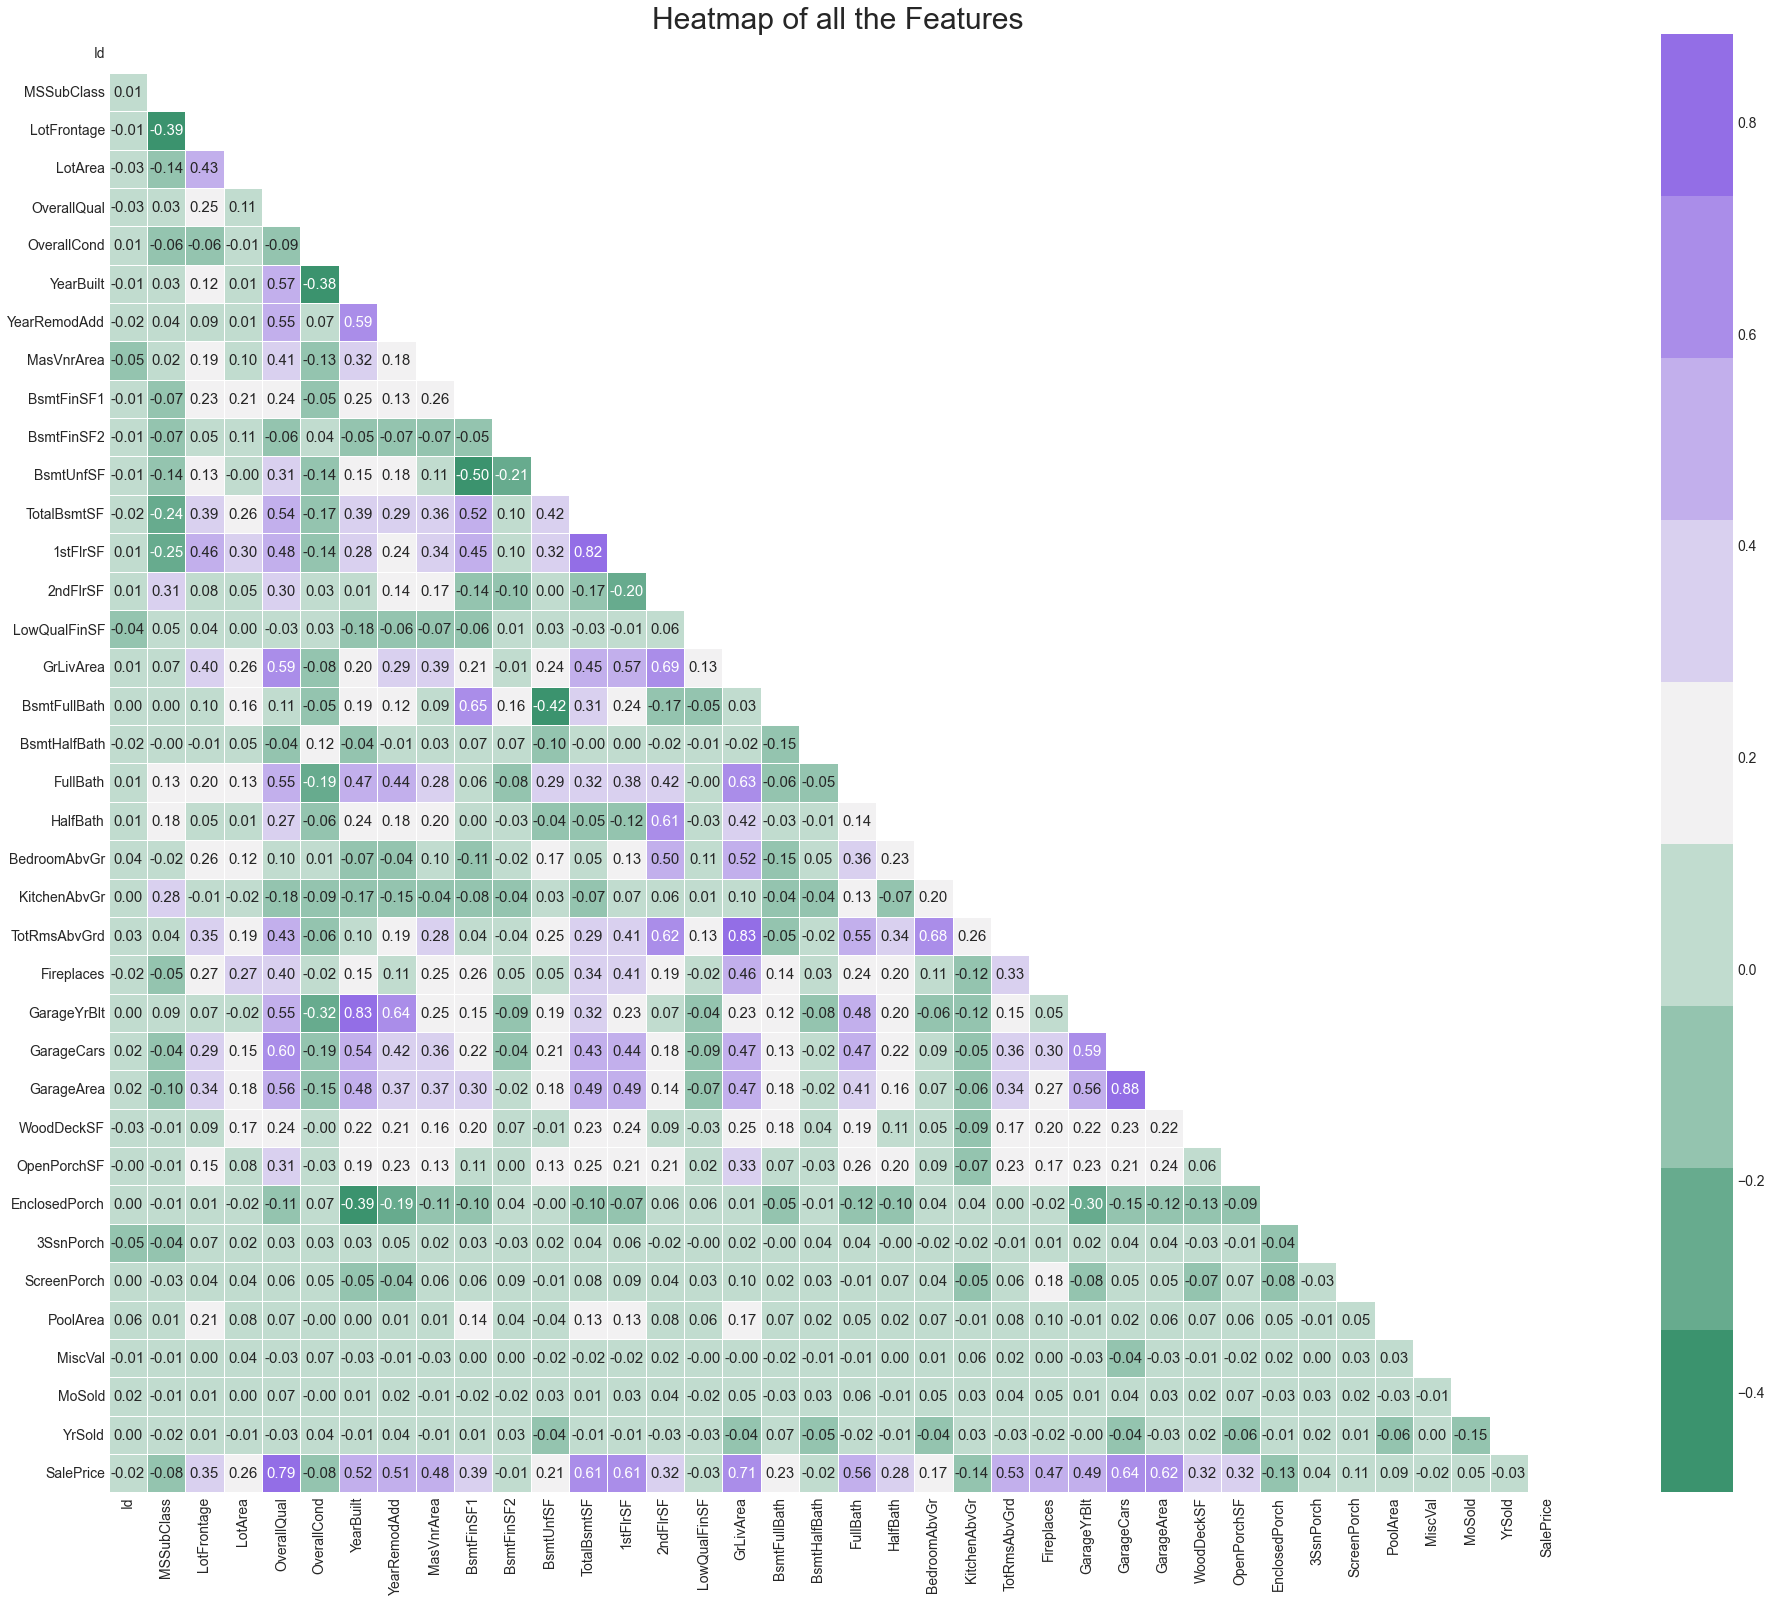

In [48]:
sns.set_style('white')
plt.subplots(figsize = (30,25))

## Plotting heatmap. 

# creating mask
mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(), 
            cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9), 
            mask = mask, 
            annot=True, 
            square=True, linewidths=.5, fmt='.2f',annot_kws={'size': 15}
           );

plt.title("Heatmap of all the Features", fontsize = 30);

# Correlation 

In [49]:
df_corr = df.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


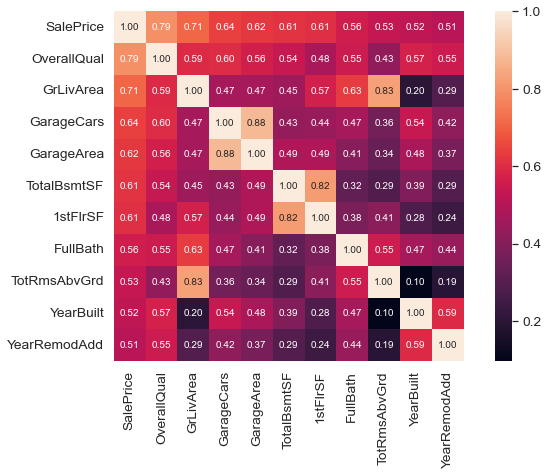

In [50]:
#Top fetures related to SalePrice
k = 11 # number of variables for heatmap
corrmat=df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

>- We see that for some features like OverallQual there is a strong linear correlation (0.79) to the target.  
>- OverallQual ,GrLivArea ,GarageCars,GarageArea ,TotalBsmtSF, 1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt, YearRemodAdd have more than 0.5 correlation with SalePrice.
>- For other features like MiscVAl the correlation is very weak.  
>- EnclosedPorch and KitchenAbvGr  have little negative correlation with target variable.
>- Correclation for Categorical Features with Sales Price will we done after preprocessing it in FE Section

# Multicollinearity

In [51]:
correlations=df.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()

unique_important_corrs=pd.DataFrame(important_corrs.items(),columns=['Attribute Pair', 'Correlation'])
multi_corr=unique_important_corrs.sort_values(by=['Correlation'],ascending = False,ignore_index= True)
multi_corr.iloc[::2]

Attribute Pair  Correlation
0       (GarageArea, GarageCars)     0.882475
2       (YearBuilt, GarageYrBlt)     0.825667
4      (TotRmsAbvGrd, GrLivArea)     0.825489
6        (1stFlrSF, TotalBsmtSF)     0.819530
8          (2ndFlrSF, GrLivArea)     0.687501
10  (TotRmsAbvGrd, BedroomAbvGr)     0.676620
12    (BsmtFullBath, BsmtFinSF1)     0.649212
14   (GarageYrBlt, YearRemodAdd)     0.642277
16         (FullBath, GrLivArea)     0.630012
18      (TotRmsAbvGrd, 2ndFlrSF)     0.616423
20          (2ndFlrSF, HalfBath)     0.609707
22     (GarageCars, OverallQual)     0.600671
24      (OverallQual, GrLivArea)     0.593007
26     (YearRemodAdd, YearBuilt)     0.592855
28     (GarageYrBlt, GarageCars)     0.588920
30      (OverallQual, YearBuilt)     0.572323
32         (GrLivArea, 1stFlrSF)     0.566024
34     (GarageArea, GarageYrBlt)     0.564567
36     (OverallQual, GarageArea)     0.562022
38      (TotRmsAbvGrd, FullBath)     0.554784
40   (OverallQual, YearRemodAdd)     0.550684
42       (FullBath, OverallQual)     0.550600
44    (GarageYrBlt, OverallQual)     0.547766
46       (GarageCars, YearBuilt)     0.537850
48    (TotalBsmtSF, OverallQual)     0.537808
50     (TotalBsmtSF, BsmtFinSF1)     0.522396
52     (GrLivArea, BedroomAbvGr)     0.521270
54      (2ndFlrSF, BedroomAbvGr)     0.502901

>- As we can see, the multicollinearity still exists in various features. 
>- 89% correlation between GarageCars and GarageArea.
>- There is 83% correlation between GarageYrBlt and YearBuilt. 
>- Similarly many other features have good correlation with other independent feature.
>- Removing of multicolinear variables will be done before model buliding part.
>- Also this table can be futher analysed for filling missing values which will be done in FE Section

---